# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [738]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [739]:
# loading data
data = pd.read_csv('C:/Users/AK153/GREAT LEARNING/Module 3 Project 3 Supervised Learning Foundations ReCell/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

### Displaying First Few Rows Of Dataset

In [740]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Displaying Last Few Rows Of Dataset

In [741]:
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


### Checking The Shape Of The Dataset

In [742]:
data.shape

(3454, 15)

**Observation**: We can see that the dataset is formed by 3454 Rows and 15 Columns.

### Checking The Data Types Of The columns For The dataset

In [743]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observation**: 
* We can observe that the dataset has 2 integer type columns, 9 Float type columns and 4 Object type Columns.
* From the non-null count, we can see that some columns have missing values as their total count does not total up to the total number of rows in the data frame

### Statistical Summary Of The Dataset

In [744]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


### Checking For Duplicate Values 

In [745]:
data.duplicated().sum()

0

**Observation**: We can observe that dataset has no duplicate values.

### Checking For Missing Values

In [746]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observation**: 
* We can Observe that the dataset has 179 missing values in 'main_camera_mp' column, 2 missing values in selfie_camera_mp' column, 4 missing values in 'int_memory' column, 4 missing values in 'ram' column, 6 missing values in 'battery' column and 7 missing values in 'weight' column.
* The target variable does not have missing values which is a good thing. Meaning we shall not lose any data by dropping rows.

In [747]:
#creating a copy of the data so that original data remains unchanged
df=data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Univariate Analysis

In [748]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="purple"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,color="orange"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [749]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    if n is None:
        if count <= 3:
            plt.figure(figsize=(count + 4, count))
        elif count>3 and count <= 15:
            plt.figure(figsize=(count + 2, count))    
        else:
            plt.figure(figsize=(count + 20, count))
    else:
        if n <= 15:
            plt.figure(figsize=(n + 2, count))
        else:
            plt.figure(figsize=(n + 20, count))

            
    
    if count<=3:
        plt.xticks(rotation=0, fontsize=count*6)# Adjust the fonts of x-axis ticks
        plt.yticks(fontsize=count*4)
    elif count>3 and count<=5:        
        plt.xticks(rotation=0, fontsize=count*4)# Adjust the fonts of x-axis ticks
        plt.yticks(fontsize=count*2.5)  # Adjust the fontsize for y-axis ticks as needed
    elif count>5 and count<=12:
        plt.xticks(rotation=0, fontsize=count*2)# Adjust the fonts of x-axis ticks
        plt.yticks(fontsize=count*2.5)  # Adjust the fontsize for y-axis ticks as needed
    else:
        plt.xticks(rotation=45, fontsize=count*1)# Adjust the fonts of x-axis ticks
        plt.yticks(fontsize=count*1.3)  # Adjust the fontsize for y-axis ticks as needed
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set1",
        order=data[feature].value_counts().index[:n],
    )


    for patch in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * patch.get_height() / total
            )  # percentage of each class of the category
        else:
            label = patch.get_height()  # count of each level of the category

        x = patch.get_x() + patch.get_width() / 2  # width of the plot
        y = patch.get_height()  # height of the plot

        if count<= 15:  # Condition for less than or equal to 18 bars
            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=16,
                xytext=(0, 5),
                textcoords="offset points",
            )  # annotate the percentage
        elif count > 15 and count <= 25:  # Condition for 19 to 25 bars
            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=20,
                xytext=(0, 5),
                textcoords="offset points",
            )  # annotate the percentage
        else:  # Condition for more than 25 bars
            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=35,
                xytext=(0, 5),
                textcoords="offset points",
            )  # annotate the percentage

    plt.show()  # show the plot

### 1.normalized_used_price

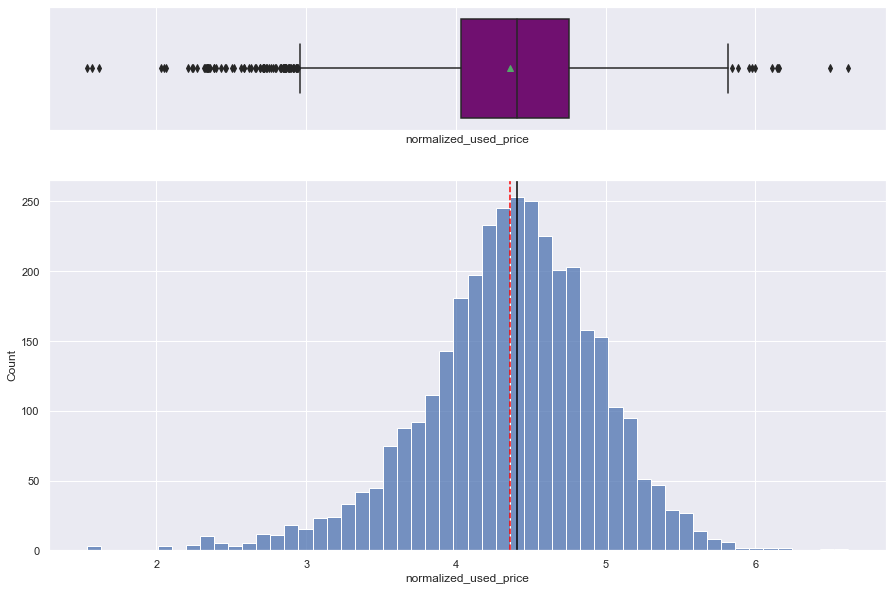

In [750]:
# Creating histogram_boxplot for Normalized Used Price Column
histogram_boxplot(df,'normalized_used_price')

* The prices of used phones approximately follows a ormal distribution and  is slight left-skewed with a median noramlized used price of 4.4 .
* From the box plot we can see that there are outliers.

### 2.normalized_new_price

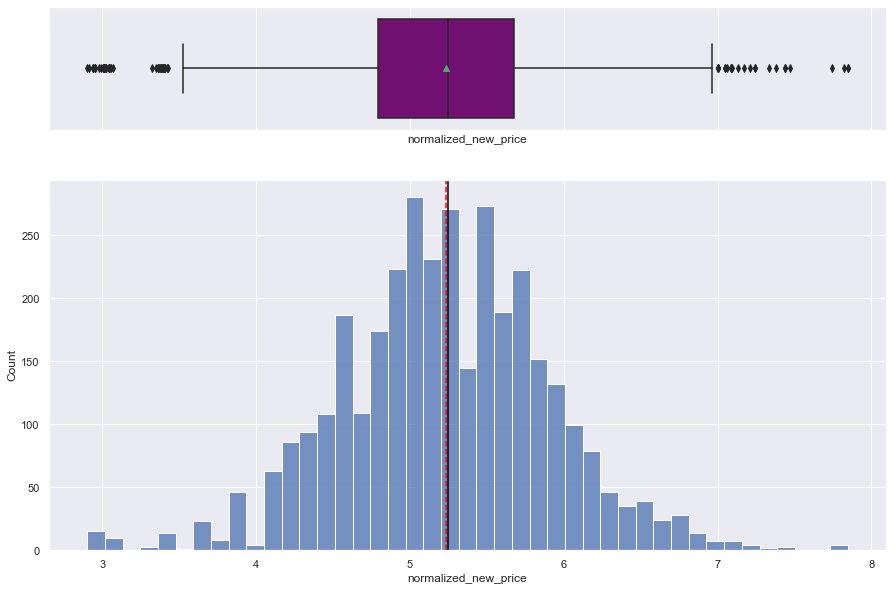

In [751]:
# Creating histogram_boxplot for Normalized New Price Column
histogram_boxplot(df,'normalized_new_price')

* The price of new phones are kind of normally distrubuted.
* We can see from the box plot that there are outliers also.

### 3.Screensize

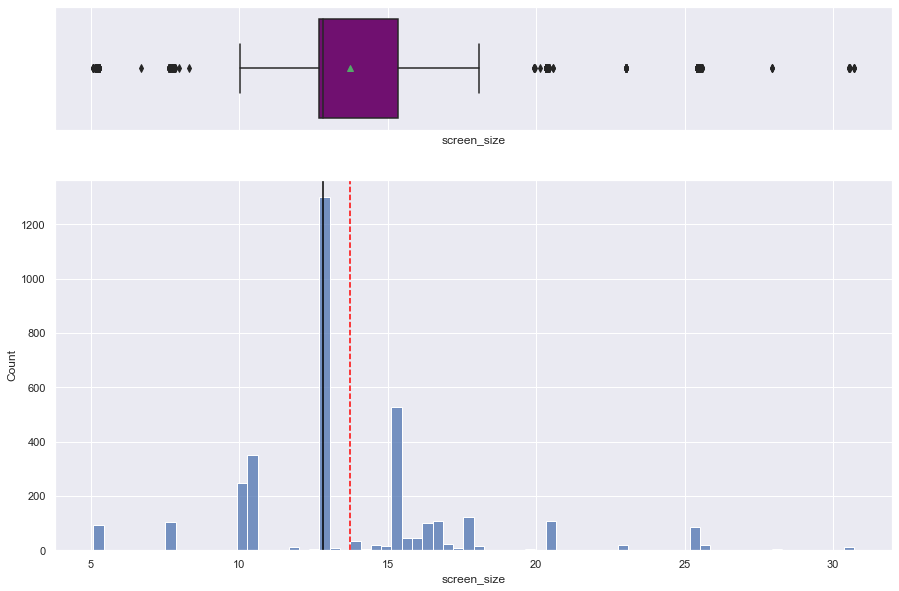

In [752]:
# Creating histogram_boxplot for Screensize Column
histogram_boxplot(df,'screen_size')

* The distribution of screen size is approximately normally distributed with a slight right-skewed which shows that some of them are tablets and not phones which are having more than 20 inch screensize.
* There is a spike in the histogram plot which shows that the phones are mostly with 12.83 inches in screensize.

### 4. main_camera_mp

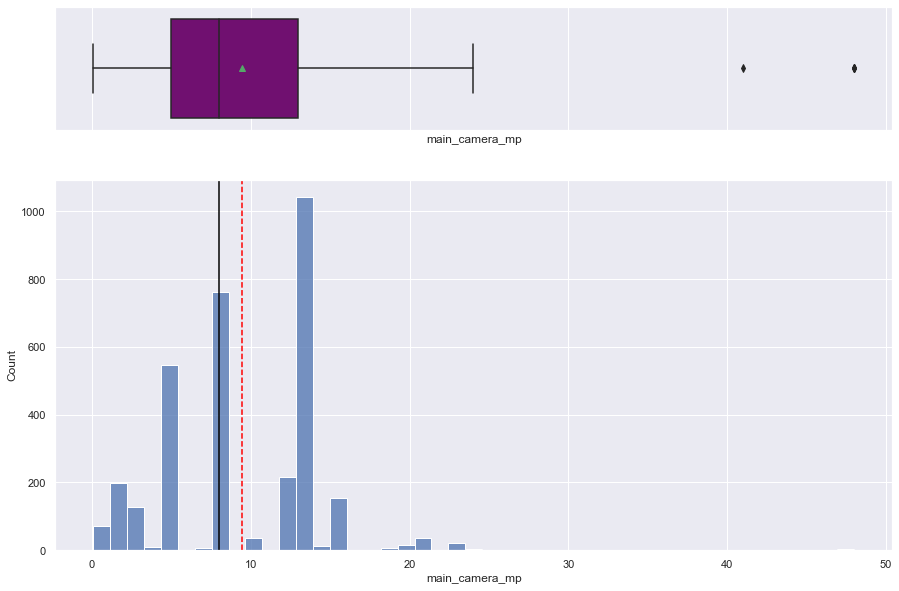

In [753]:
# Creating histogram_boxplot for Main Camera MP Column
histogram_boxplot(df,'main_camera_mp')

### 5. selfie_camera_mp

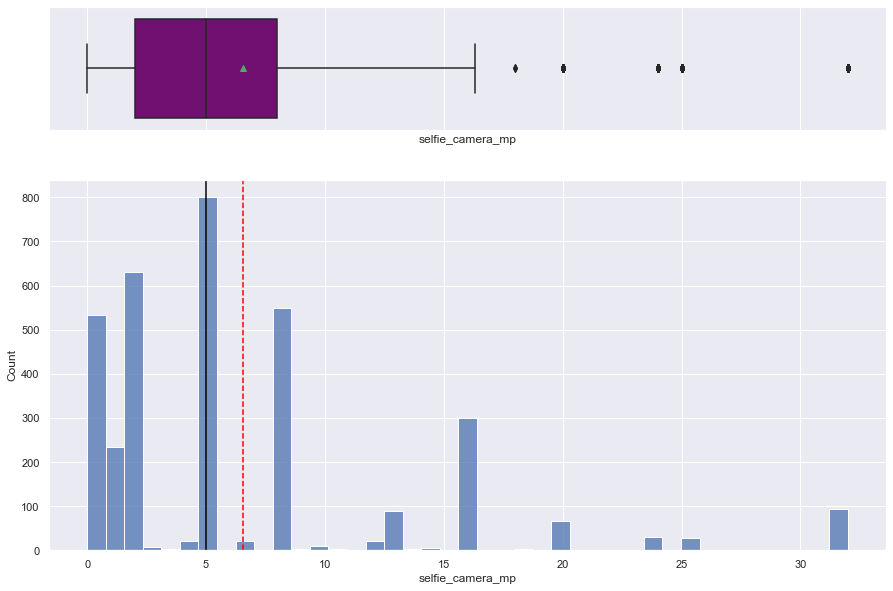

In [754]:
# Creating histogram_boxplot for Selfie Camera MP Column
histogram_boxplot(df,'selfie_camera_mp')

* The distribution of selfie camera pixels is right skewed.

### 6. weight

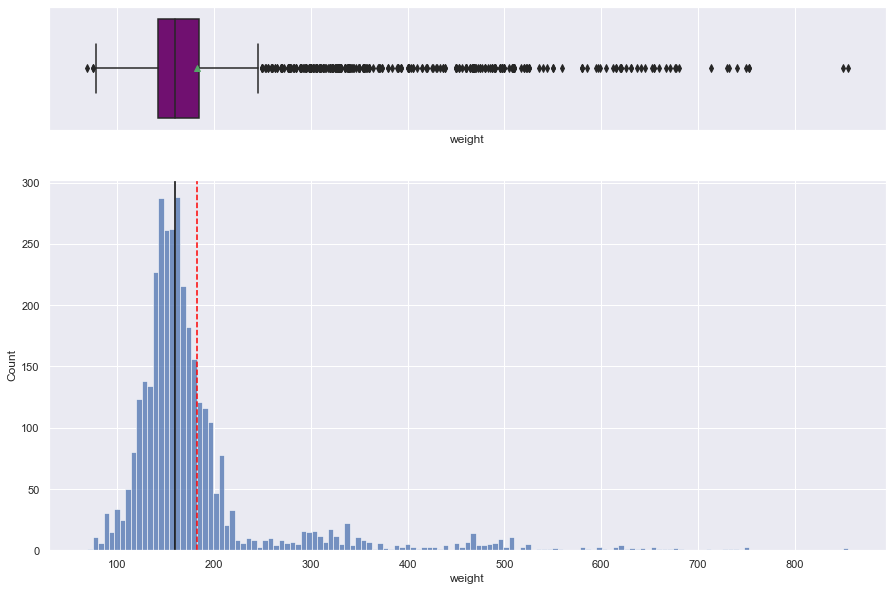

In [755]:
# Creating histogram_boxplot for Weight Column
histogram_boxplot(df,'weight')

* The weight column is heavily right skewed.
* During data preprocessing for model building, i willperform a log transformation to reduce the skewness.

### 7. battery

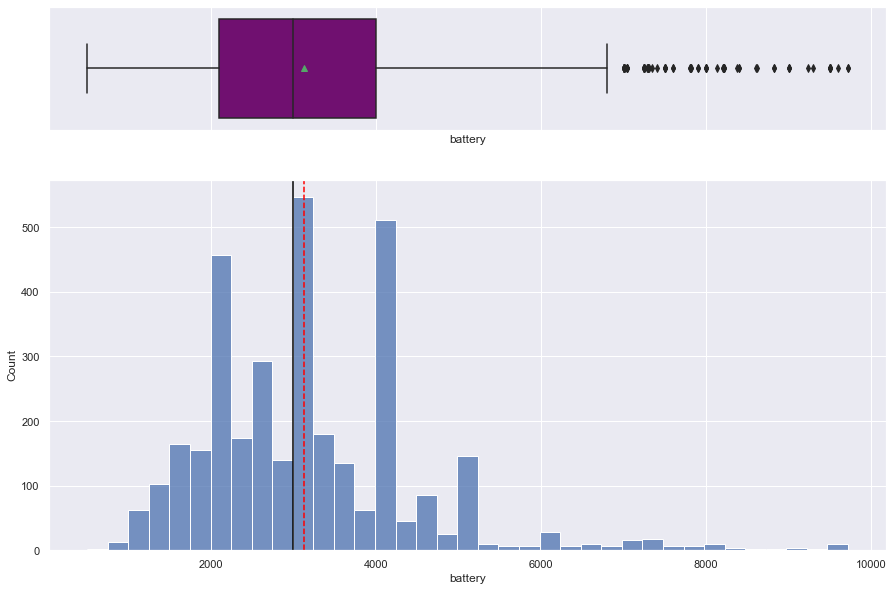

In [756]:
histogram_boxplot(df, 'battery')

* There is right-Skewness in the battery column.

### 8. days_used

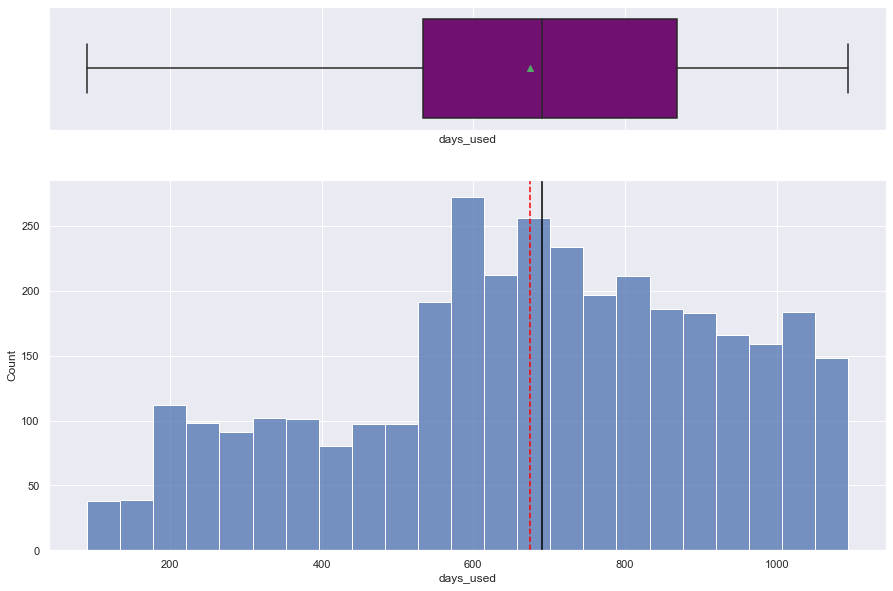

In [757]:
# Creating histogram_boxplot for Days Used Column.
histogram_boxplot(df, 'days_used')

* The days used are approximately normally distributed.

### 9. int_memory

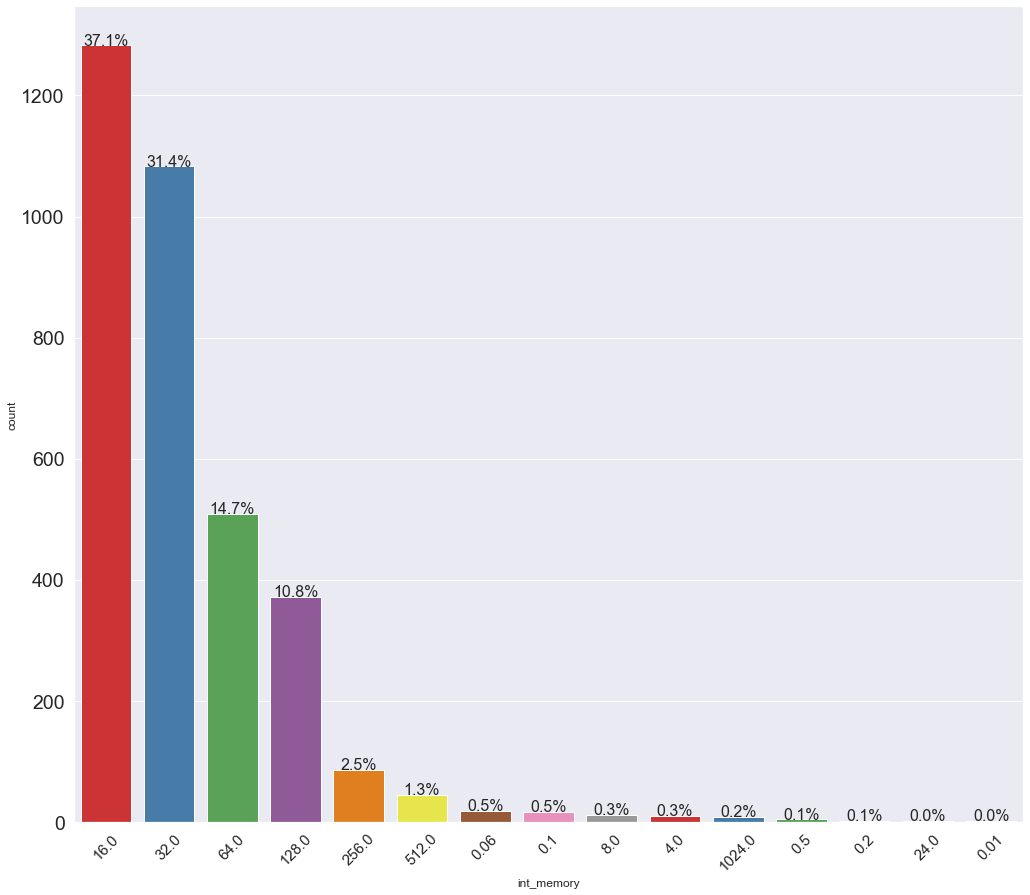

In [758]:
# Creating labeled_barplot for Internal Memory Column.
labeled_barplot(df, 'int_memory')

* Most of the phones have an internal memory of 16gb followed by 32gb which is nearly 70% of the phones.
* This means customers mostly buy phones of 16 GB or 32 GB internal memory.

### 10. ram

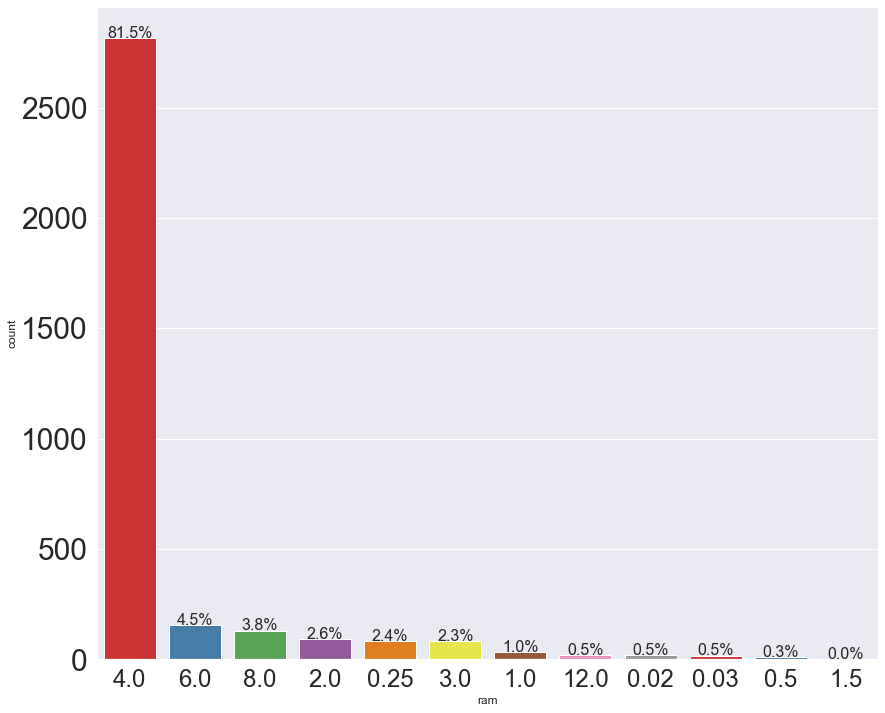

In [759]:
# Creating labeled_barplot for RAM Column.
labeled_barplot(df, 'ram')

* Majority of the phones have RAM of 4 GB which shows that majority customers prefer atleast 4GB ram

### 11. brand_name

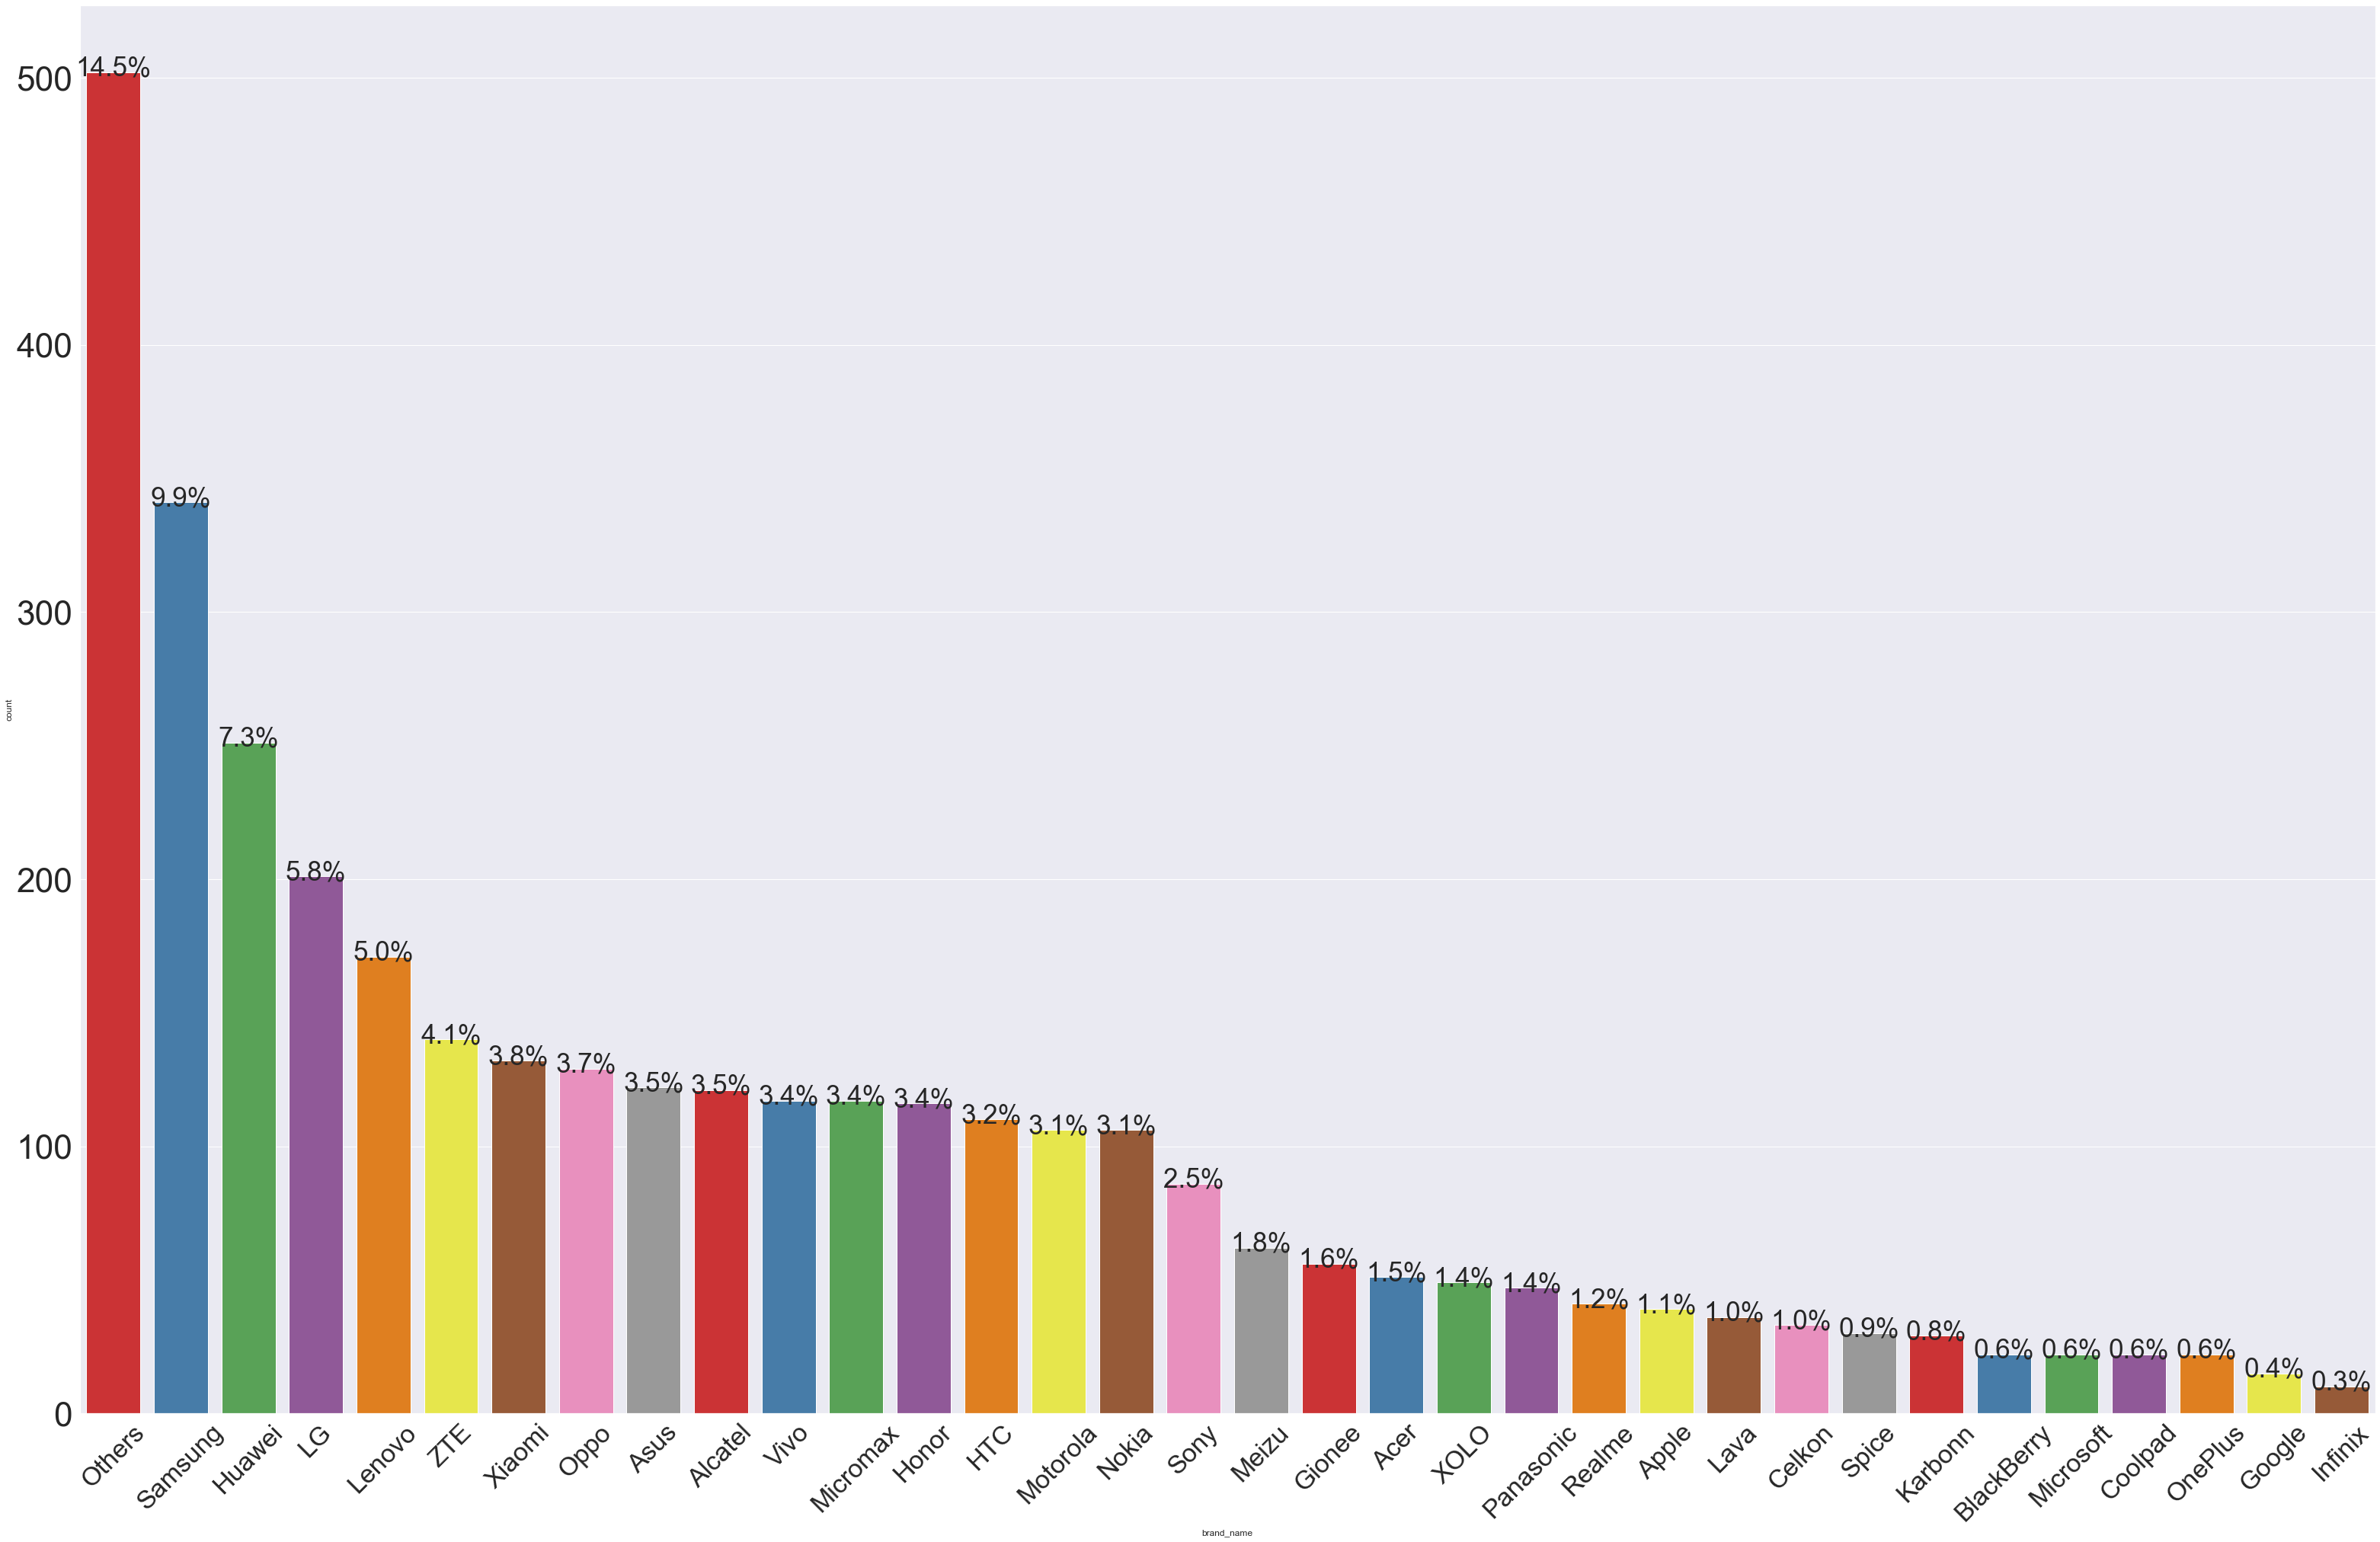

In [760]:
# Creating labeled_barplot for Brand Name Column.
labeled_barplot(df, 'brand_name')

* Most of the brand names were not given and they fall under the category of others
* Samsung have a higher percentage compared to others. This means customers mostly buy refurbished samsung phones.

### 12. os

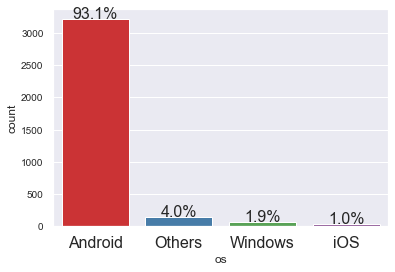

In [761]:
# Creating labeled_barplot for OS Column.
labeled_barplot(df, 'os')

* Android devices are the most refurbished ones with a percentage of 93.1 in the Refurbished market
* iOS devices are the least refurbished ones with a percentage of 1.0% in the refurbished market

### 13. 4g

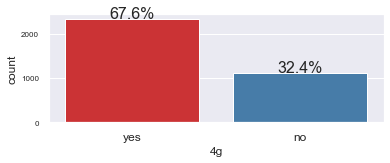

In [762]:
# Creating labeled_barplot for 4G Column.
labeled_barplot(df, '4g')

### 14. 5g

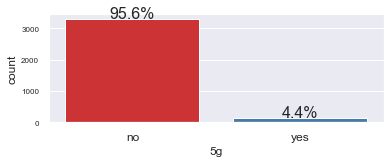

In [763]:
# Creating labeled_barplot for 5G Column.
labeled_barplot(df, '5g')

* A lot of 4g devices were refurbished compared to 5g devices.

### 15. release_year

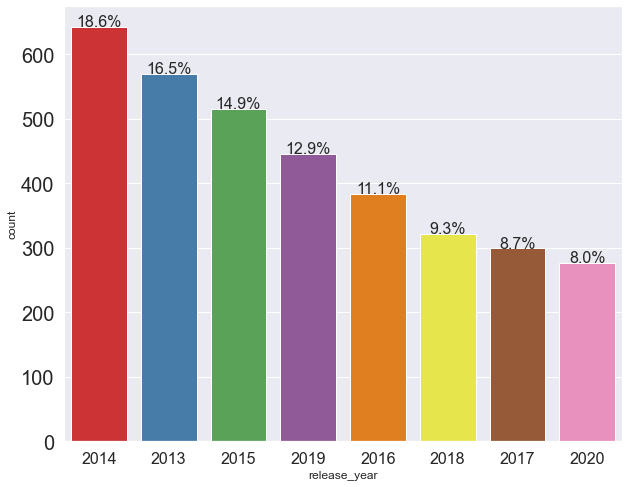

In [764]:
# Creating labeled_barplot for Released Year Column.
labeled_barplot(df, 'release_year')

* Devices released in 2014 were the most refurbished ones

## Bivariate Analysis

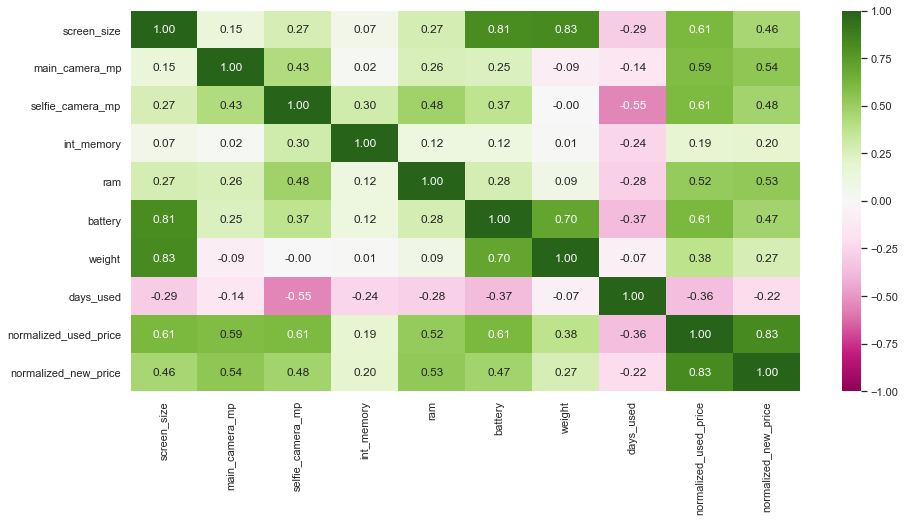

In [765]:
# creating a list of numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("release_year")  # dropping the release_year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="PiYG",
);

#### Observations:
* Battery and Screen_size are highly correlated
* Weight and screen size are highly correlated
* normalized_new_price and normalized_used_price also show high correlation
* There is a negative correlation between days_used and selfie_camera
* There is a negative correlation between days_used and normalized_used_price

### The more Ram the device has, the faster the device works. Let us see which brands give more RAM to its devices.

#### Ram VS Brand_name

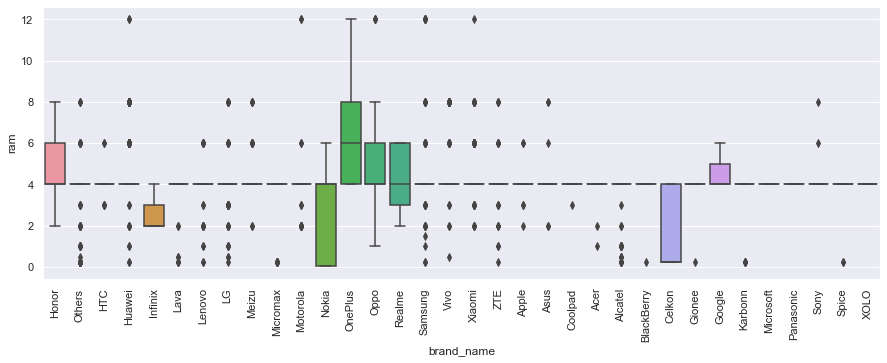

In [766]:
# Comparing Ram with various Brand Names
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#### Observations:
* OnePlus brand gives more RAM to the device.

#### OS VS Battery

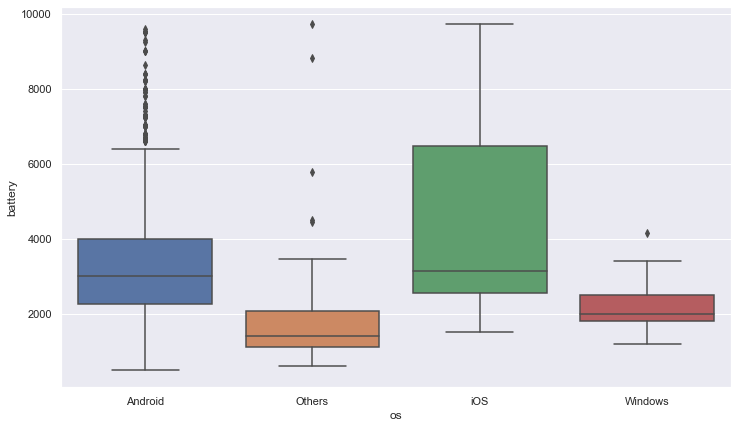

In [767]:
# Comparing OS with Battery Sizes
sns.set(rc = {'figure.figsize':(12,7)}) # set figure size
sns.boxplot(x="os", y="battery", data=df);

#### Brand Name VS Battery

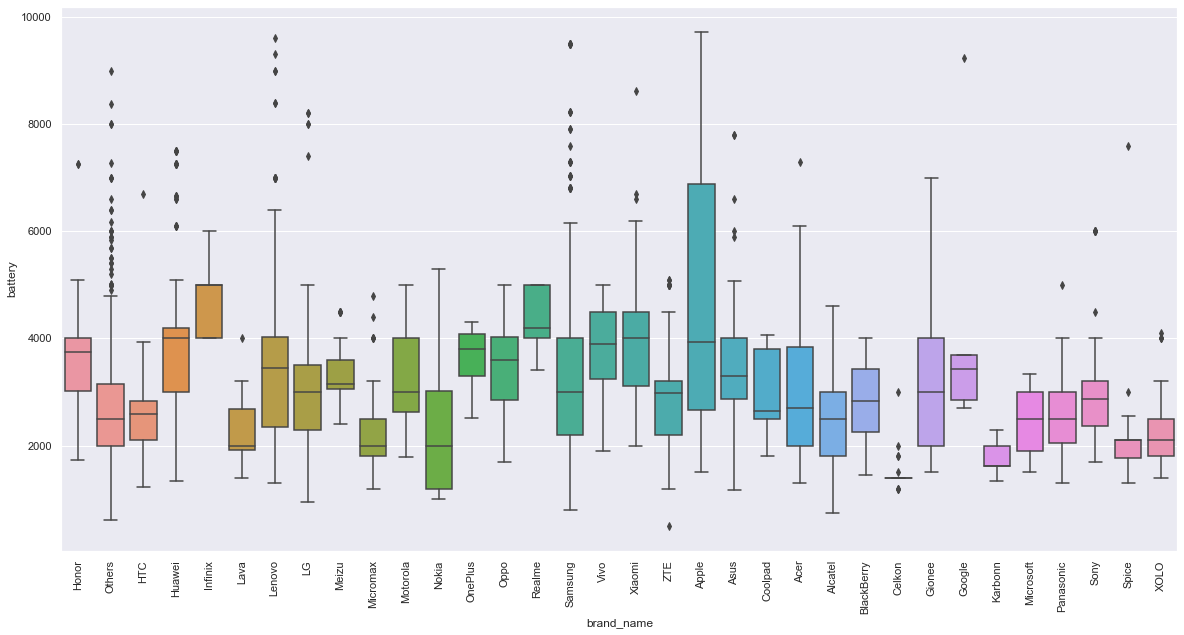

In [768]:
# Comparing Brand Names with Battery Sizes
sns.set(rc = {'figure.figsize':(20,10)}) # set figure size
sns.boxplot(x="brand_name", y="battery", data=df)
plt.xticks(rotation=90);

#### Observations:
* Apple brand offers most of its devices with a large Energy capacity of the device battery in mAh which also states that the OS is iOS.

### People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.

In [769]:
df_large_battery=df[df['battery']>4500]
df_large_battery.shape

(341, 15)

In [770]:
df_large_battery['brand_name'].value_counts()

Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
Realme       12
LG           12
ZTE          10
Gionee       10
Acer          7
Infinix       6
Sony          6
Oppo          4
Micromax      1
Alcatel       1
Nokia         1
Panasonic     1
Spice         1
Google        1
HTC           1
Name: brand_name, dtype: int64

In [771]:
df_large_battery['os'].value_counts()

Android    324
iOS         14
Others       3
Name: os, dtype: int64

#### Brand Name VS Weight

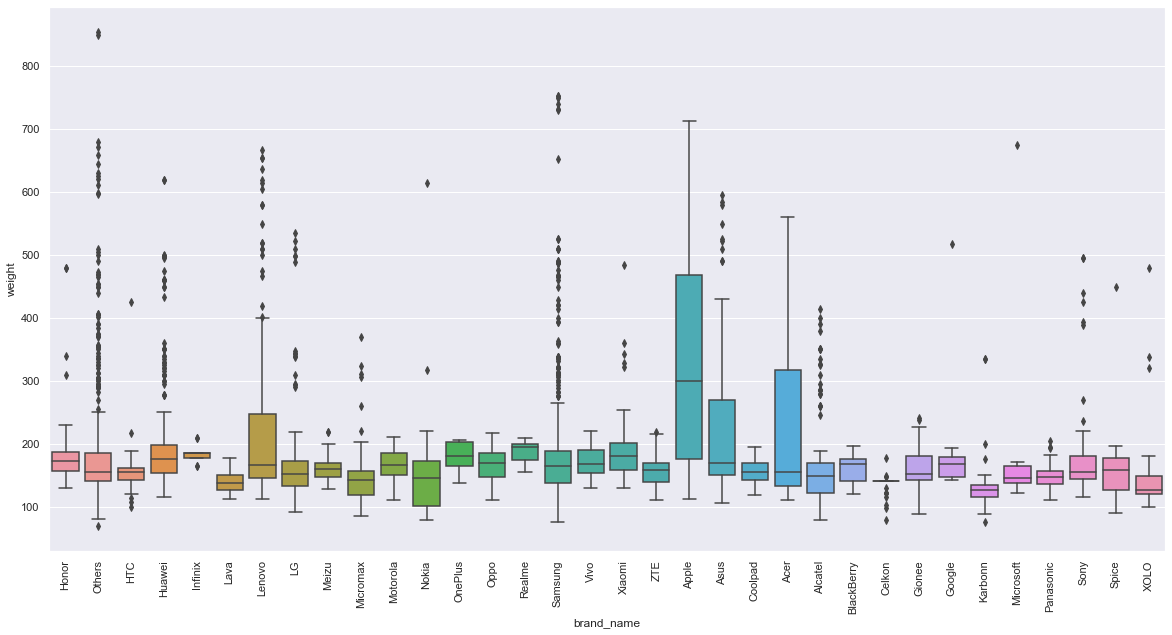

In [772]:
# Creating a boxplot for Brand Name and Weight
plt.figure(figsize=(20, 10))
sns.boxplot(x='brand_name',y='weight',data=df) 
plt.xticks(rotation=90)
plt.show()

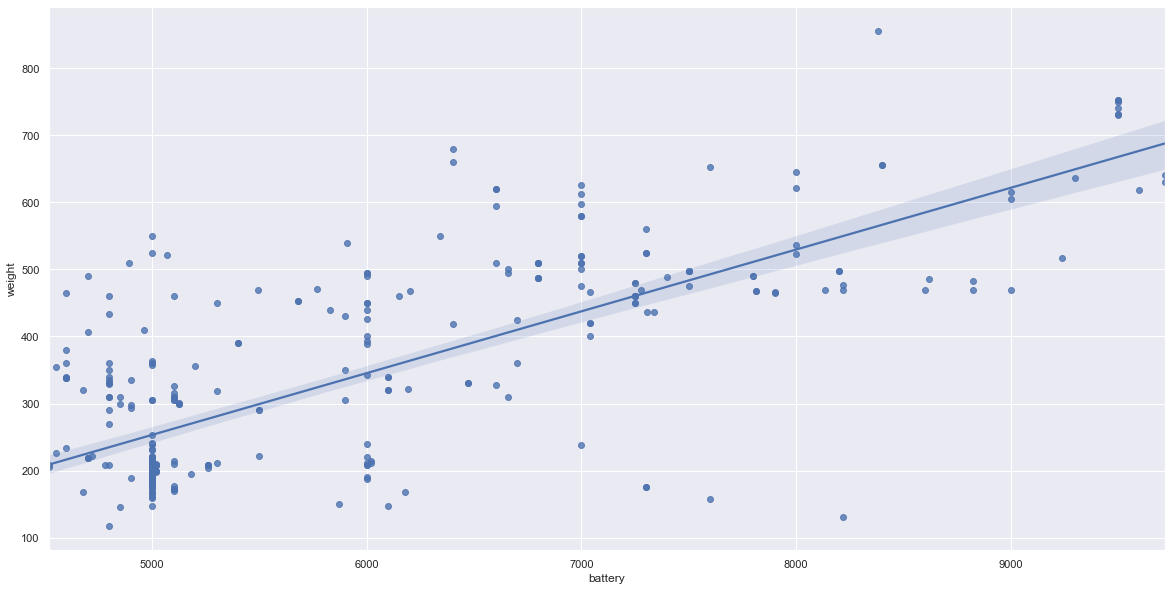

In [773]:
sns.regplot(x="battery", y ="weight", data=df_large_battery);

#### OS VS Weight

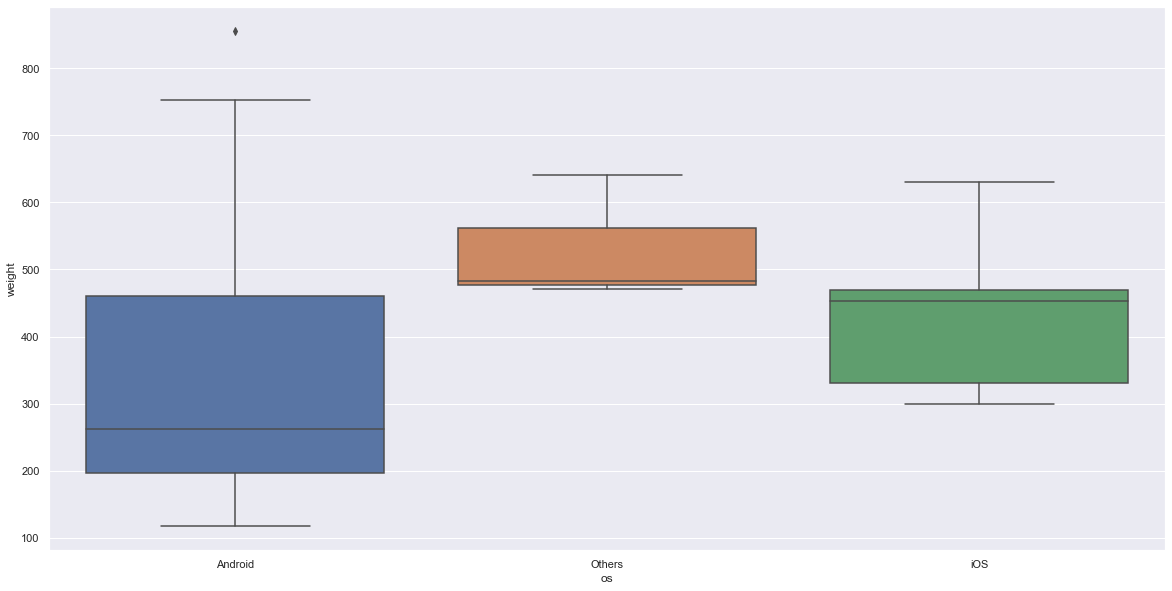

In [774]:
# Creating a Boxplot for weight vs os
sns.boxplot(x="os", y ="weight", data=df_large_battery)
plt.xticks(rotation=0);

#### Observations:
* The Samsung brand gives most of its devices large batteries of more than 4500 mAh. This means samsung phones are heavier as compared to other brands.
* Phones with large batteries of more than 4500 mAh most fall under the Android OS category. This means that Android phones are generally more heavier.
* As battery capacity increases weight increase

### People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.

In [775]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

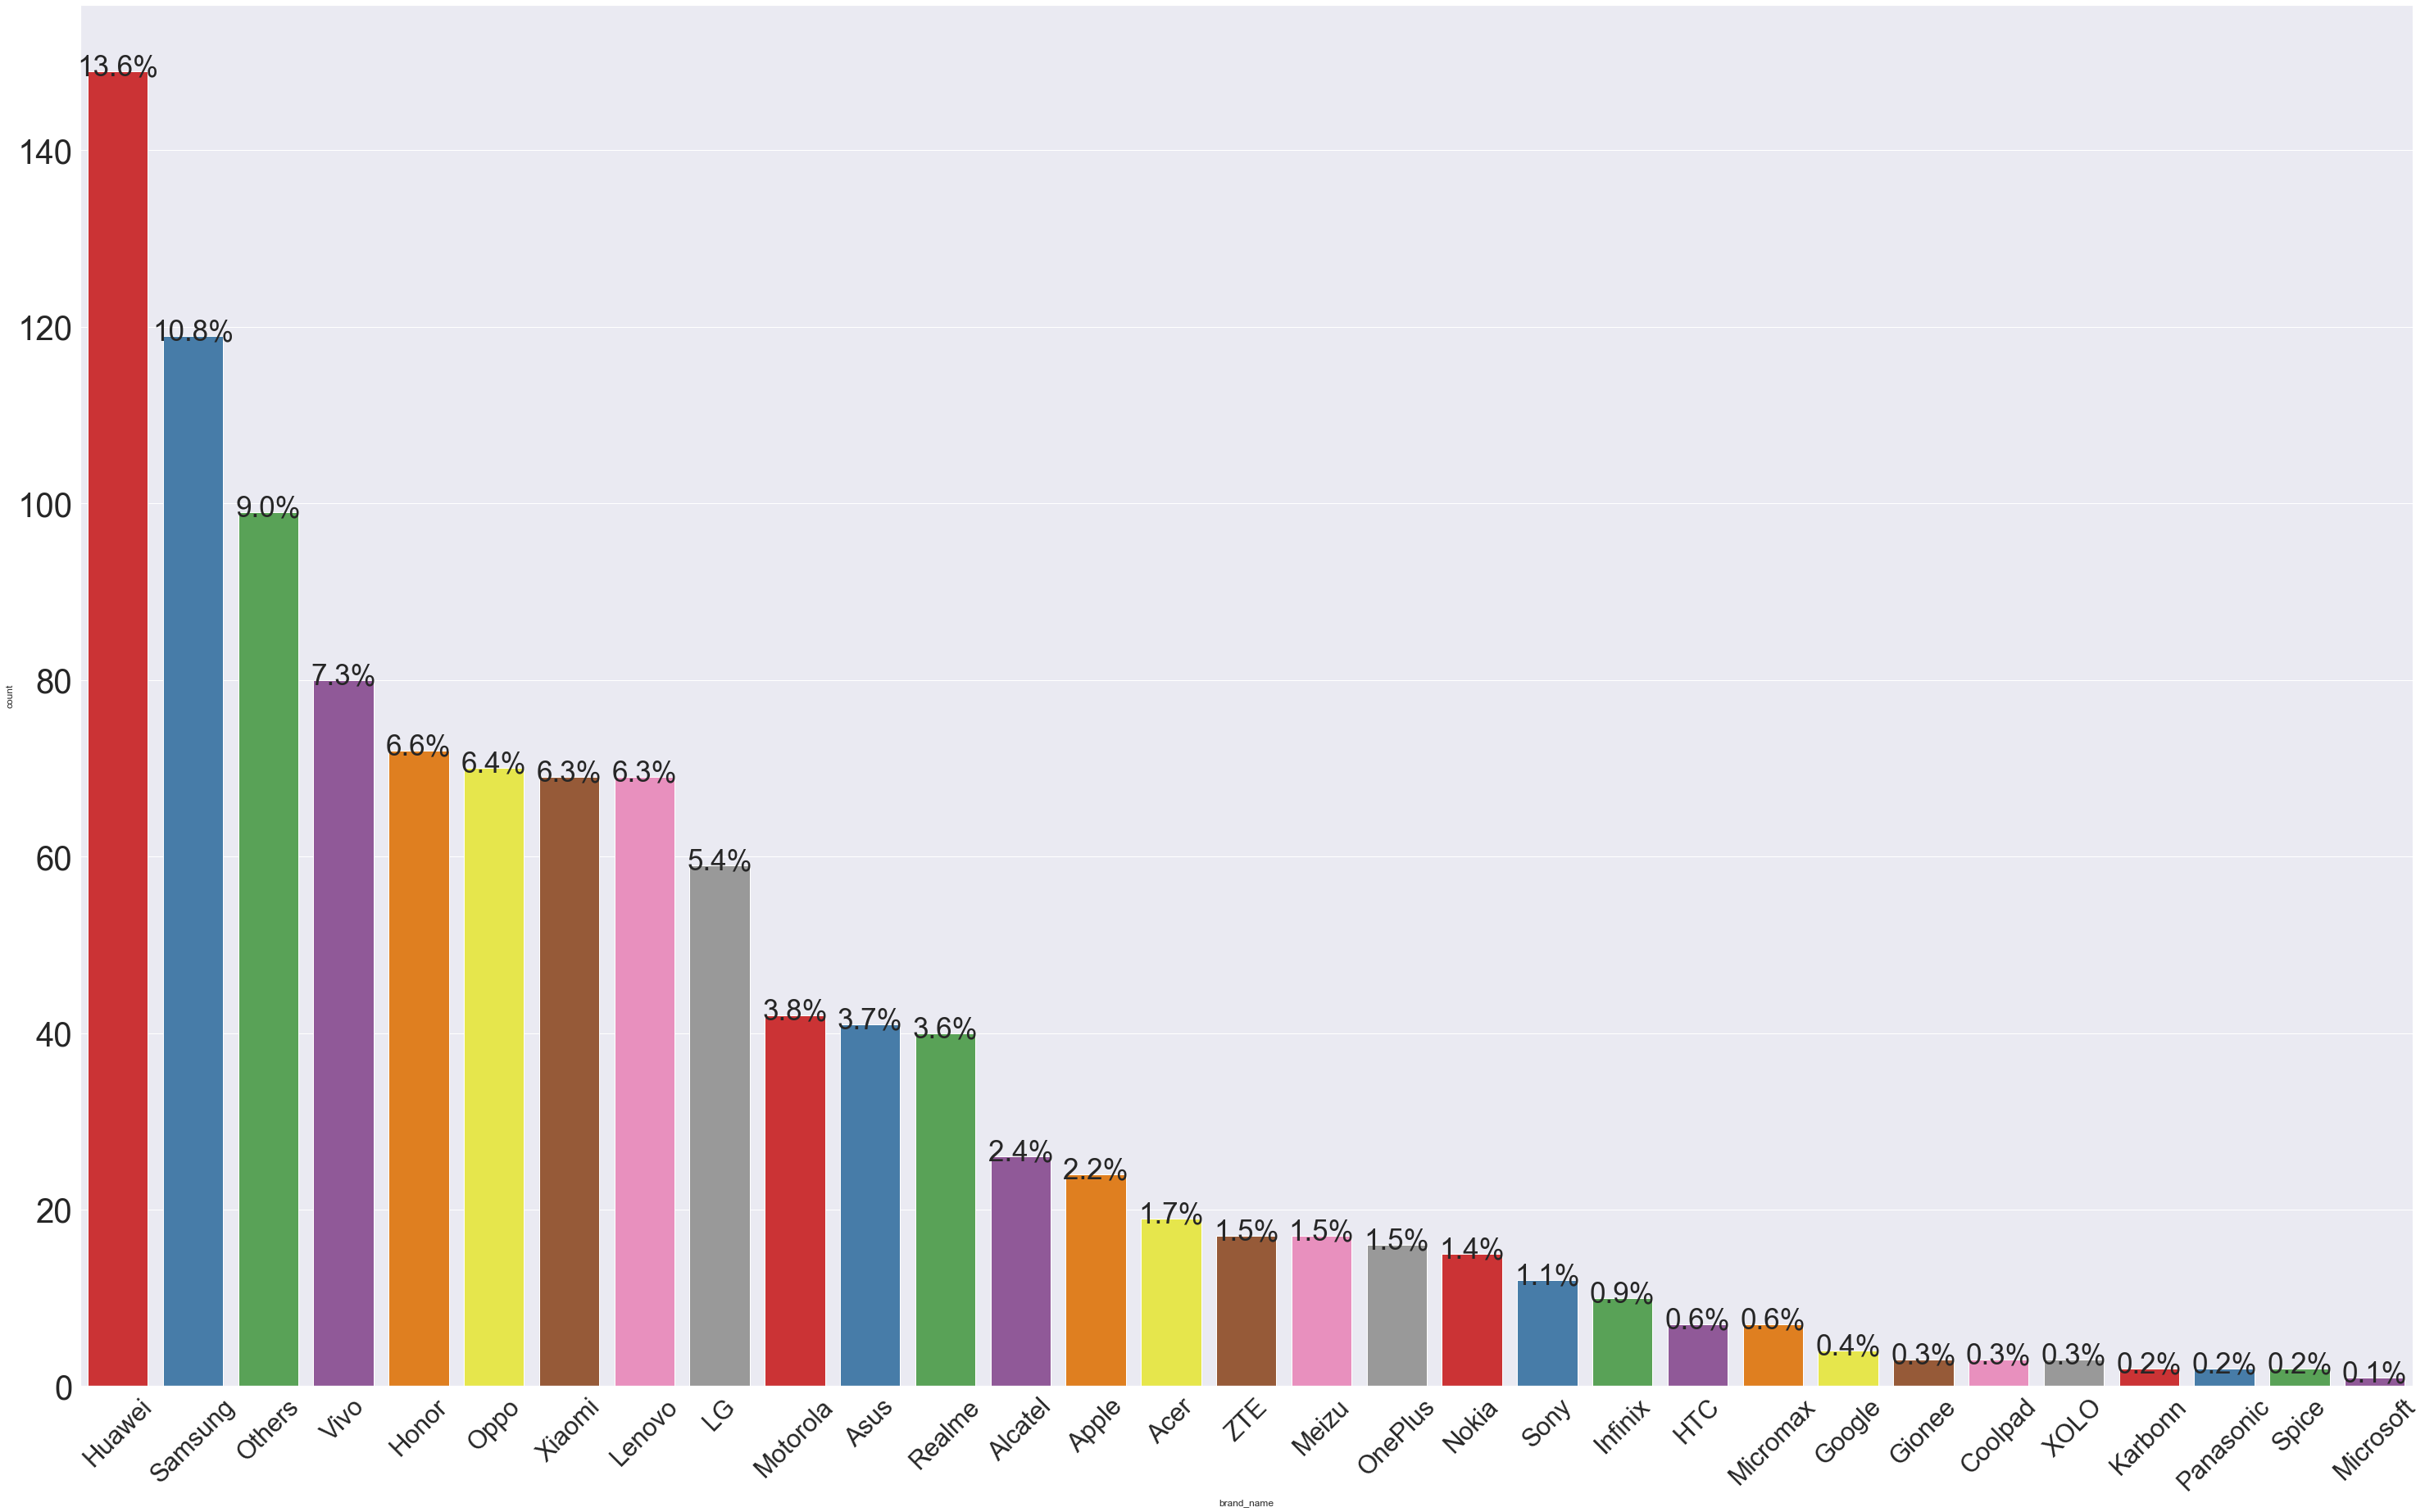

In [776]:
#Creating labeled_barplot for 'brand_name' in large screen dataframe
labeled_barplot(df_large_screen,'brand_name')  

### Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.

In [777]:
# Creating new dataframe with Selfie Camera Mp greater than 8 mp
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

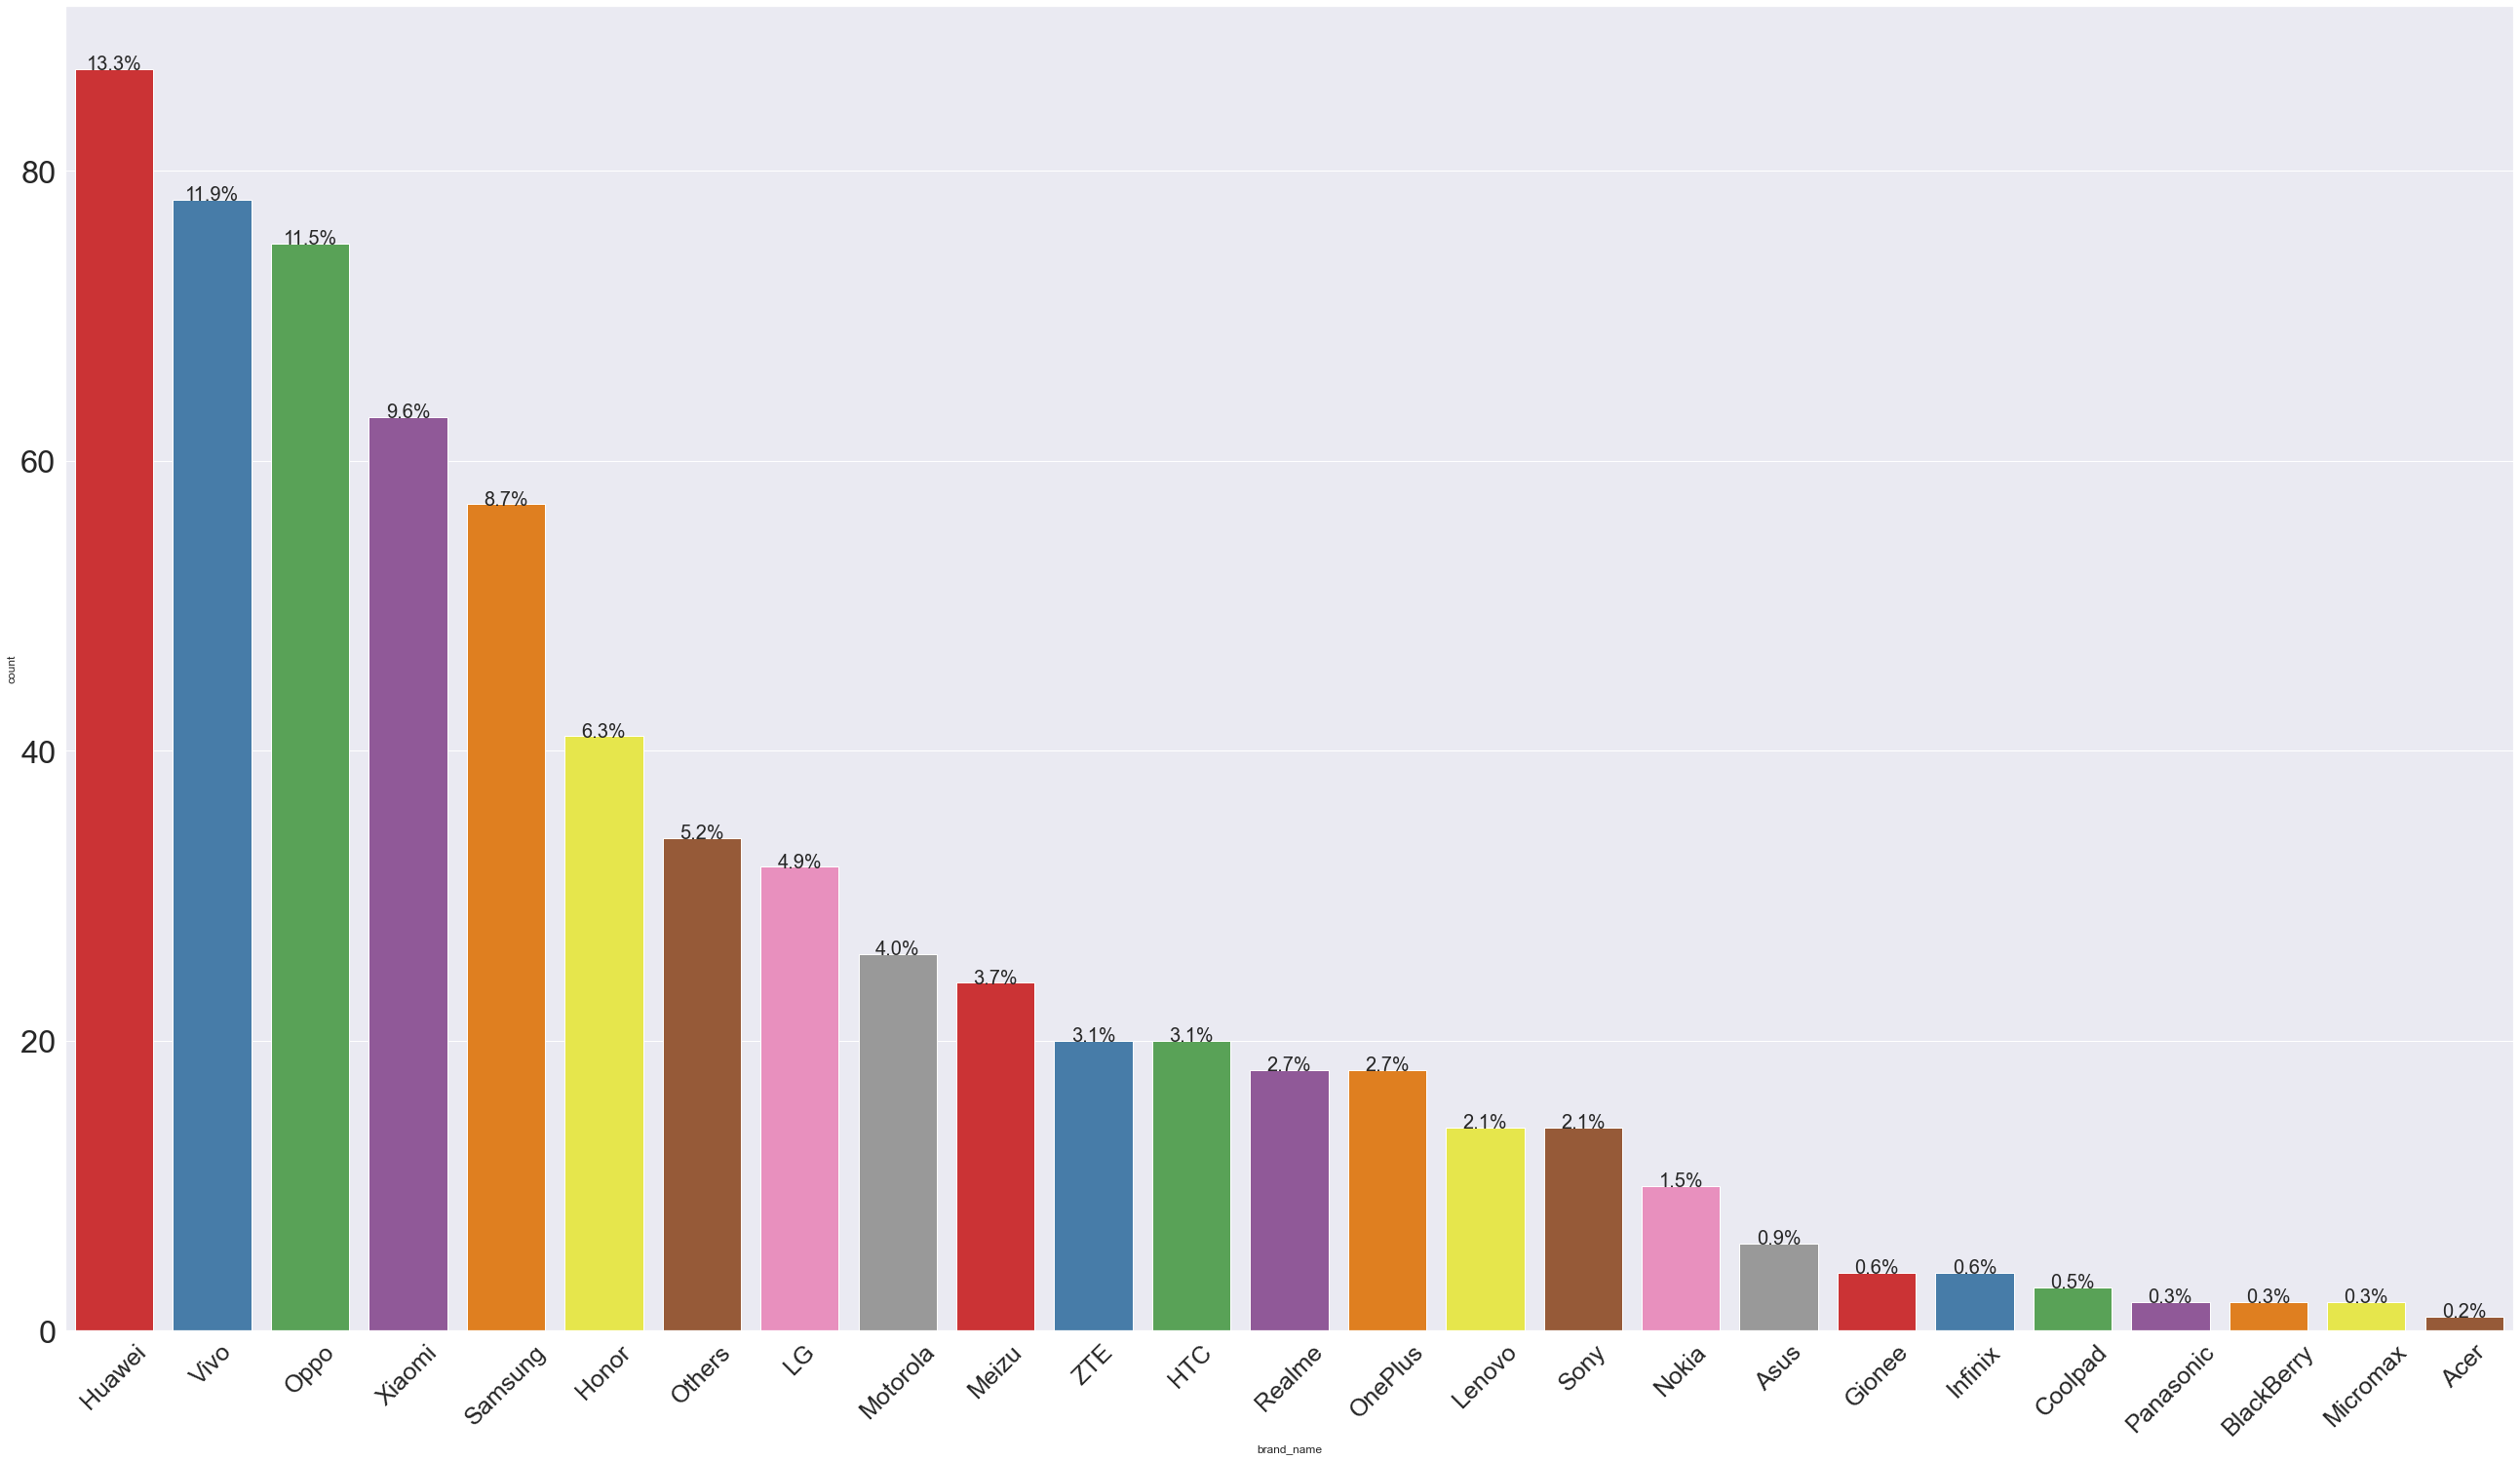

In [778]:
#Creating labeled_barplot for 'brand_name' in Higher selfie camera dataframe
labeled_barplot(df_selfie_camera,'brand_name')

### Let's do a similar analysis for rear cameras. Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [779]:
# Creating new dataframe with Main Camera Mp greater than 8 mp
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

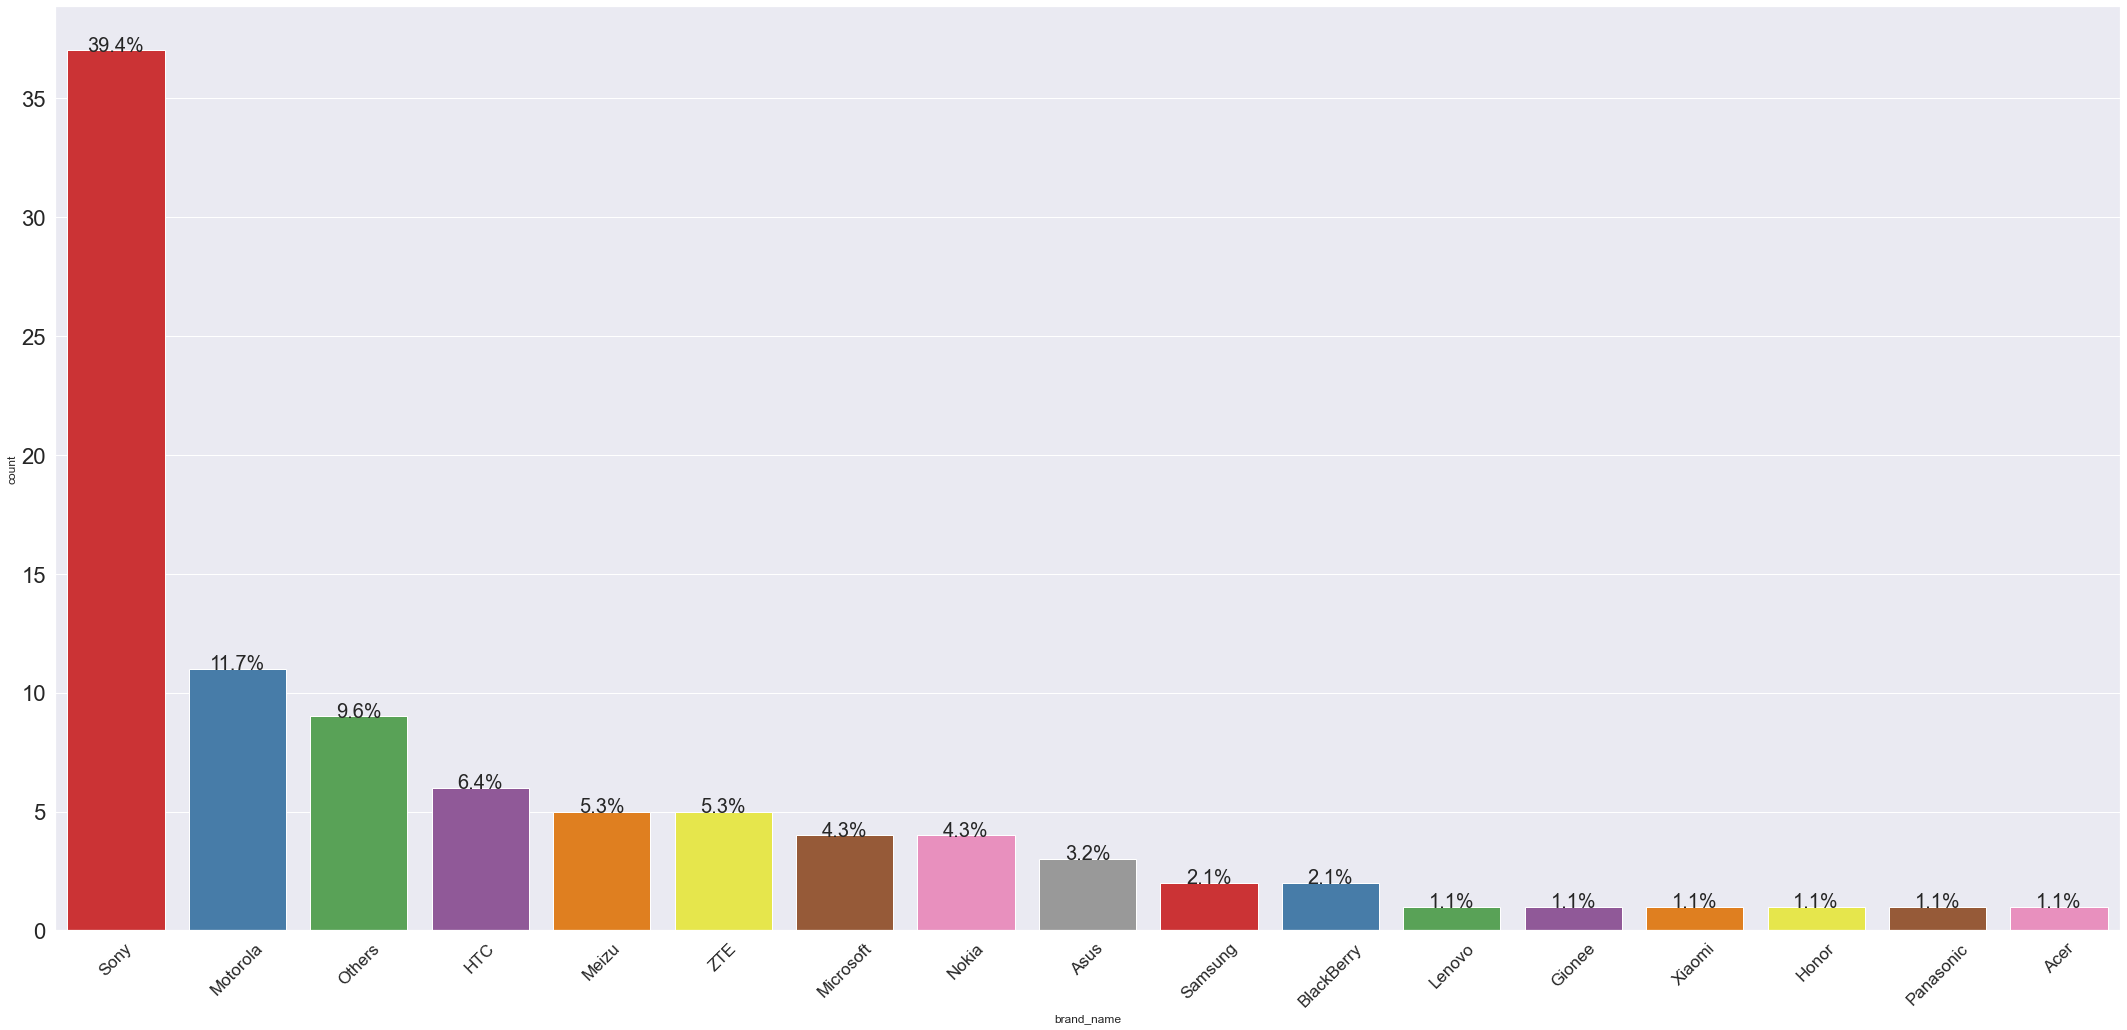

In [780]:
#Creating labeled_barplot for 'brand_name' in Higher Mp Main Camera dataframe
labeled_barplot(df_main_camera,'brand_name')

### Let's see how the price of used devices varies across the years.

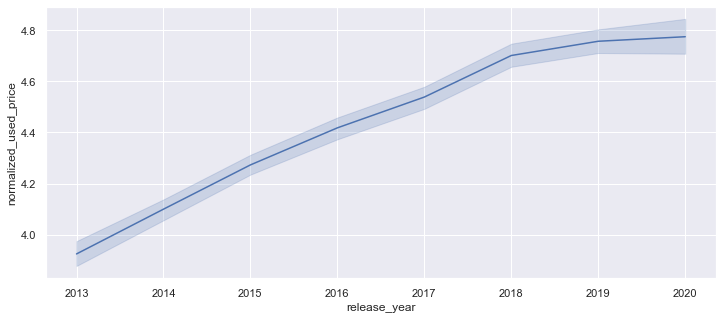

In [781]:
# Create a lineplot for release year and used price
plt.figure(figsize=(12, 5))
sns.lineplot(x='release_year',y='normalized_used_price',data=df) 
plt.show()

### Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.

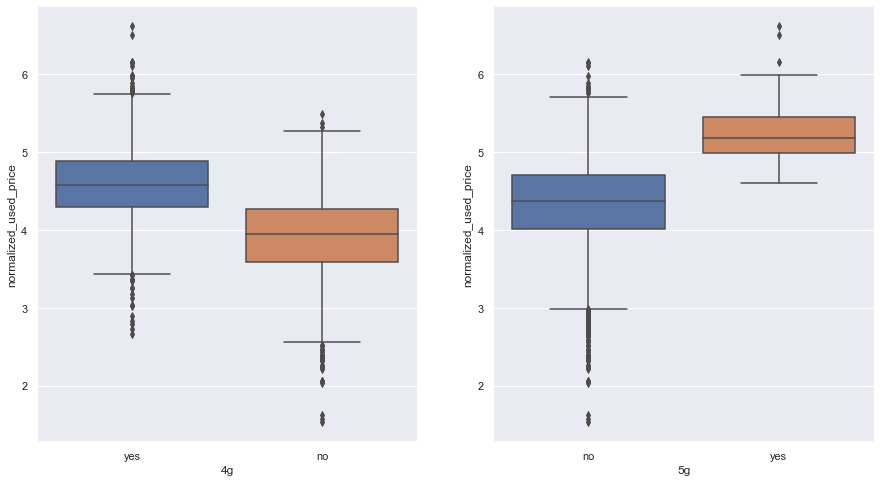

In [782]:
plt.figure(figsize=(15, 8))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment
* We will impute the missing values in the data by the column medians grouped by release_year and brand_name.

In [783]:
# creating a copy of the data frame
df1 = df.copy()

In [784]:
# let us looking at missing values in the dataframe again
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [785]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name','release_year'])[col].transform("median")
    )   ## Writing code to impute missing values in cols_impute with median by grouping the data on release year and brand name 

# checking for missing values
df1.isnull().sum() ## Writing the code to check missing values after imputing the above columns

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are still have missing values missng values.
* Let us impute these missing values with median of the columns grouped by just brand name

In [786]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) ## Writing the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isnull().sum() ## Writing the code to check missing values after imputing the above columns

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

* main_camera_mp still has 10 missing values
* Let us go ahead and impute these missing values with the median of the column(main_camera_mp)

In [787]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) ## Writing the code to impute the data with median

# checking for missing values
df1.isnull().sum() ## Writing the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

* Great now We have no more Missing values.

### Log Transformation

In [788]:
# perform log transformation on the weight column and create a new column called *weight_log*
df1["weight_log"] = np.log(df1["weight"])
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


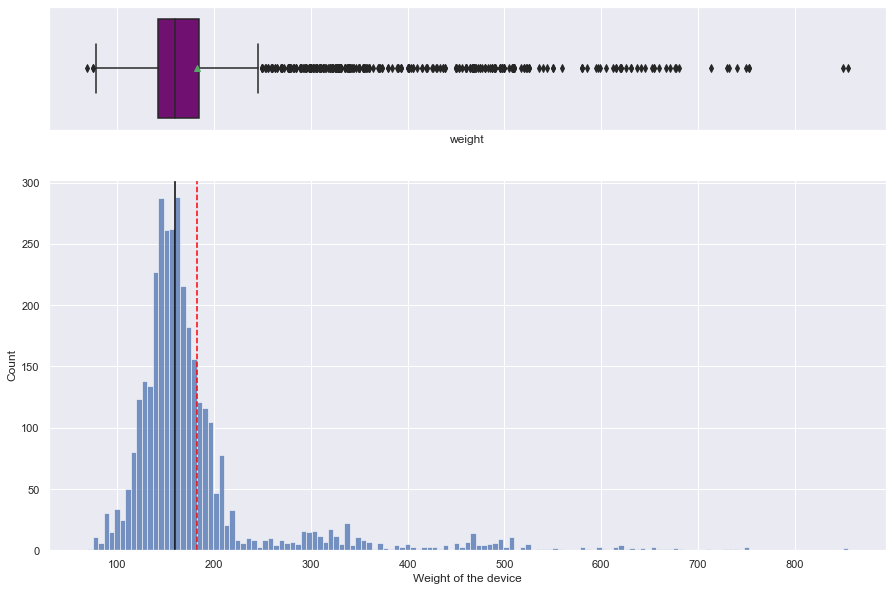

In [789]:
# weight column distribution before log transformation
histogram_boxplot(data,"weight")
plt.xlabel("Weight of the device");

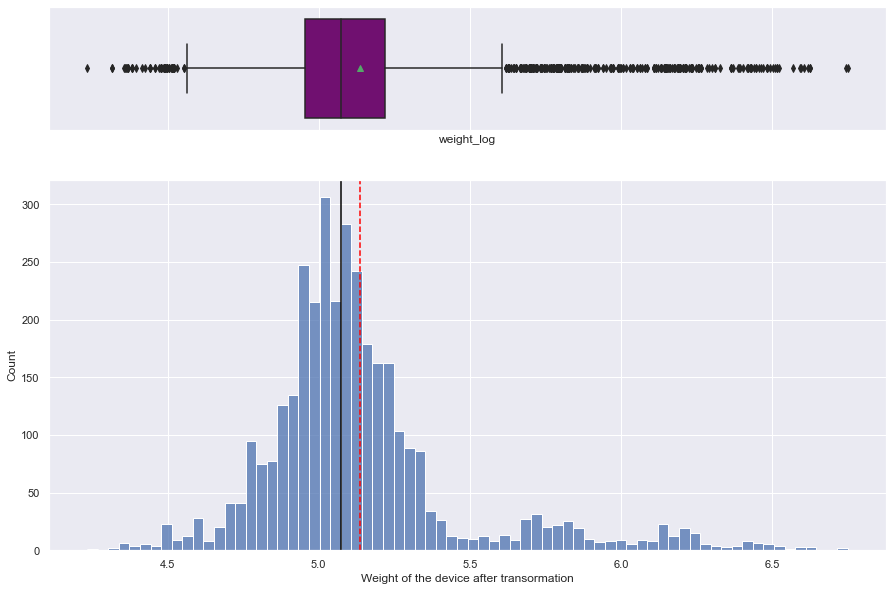

In [790]:
# weight column distribution after log transformation
histogram_boxplot(df1,"weight_log")
plt.xlabel("Weight of the device after transormation");

#### Observations:
* The weight column distribution after log transformation behaves better as compared to before
* We will go ahead and drop the weight column and leave the weight_log column

In [791]:
# drop weight column
df1.drop(["weight"], axis=1, inplace=True)

### Feature Engineering

* Let's create a new column years_since_release from the release_year column.
* We will consider the year of data collection, 2021, as the baseline as it was the year this data was collected
* We will drop the release_year column.

In [792]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier Check

* Let's check for outliers in the data.

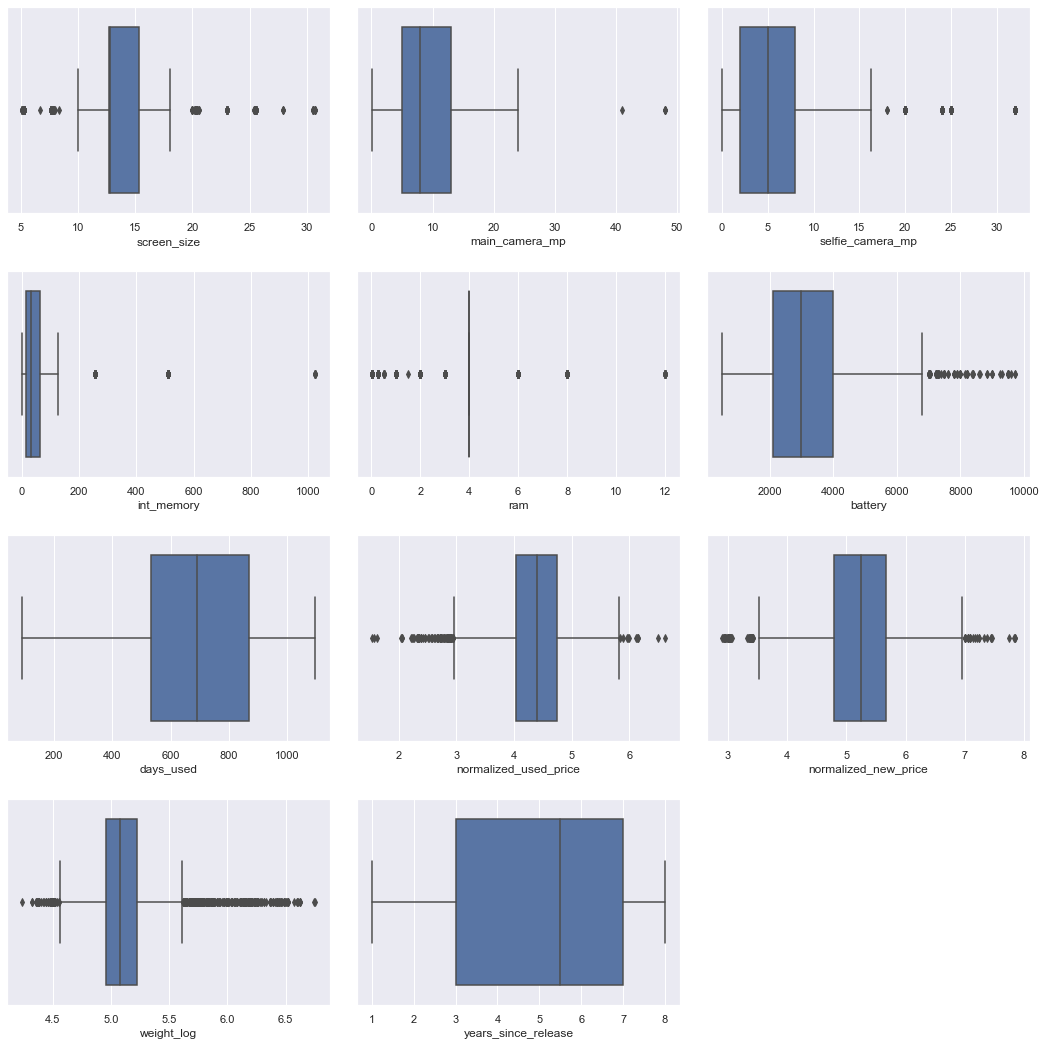

In [793]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Outlier Treatment

In [794]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [795]:
# list of columns to treat for outliers
treat_out_cols = ["weight_log", "normalized_new_price", "battery", 
                  "int_memory", "selfie_camera_mp", "main_camera_mp", "screen_size"] 


**NB:** We will not treat outliers in the ram column as doing so will remove the variation in the column and most likely make it a constant, which is not desirable, and so it is omitted in the list of columns to treat.

In [796]:
# Creating a new data frame after treating outliers in the colums
df2 = treat_outliers_all(df1, treat_out_cols)

### Re-check columns to see if outliers were treated

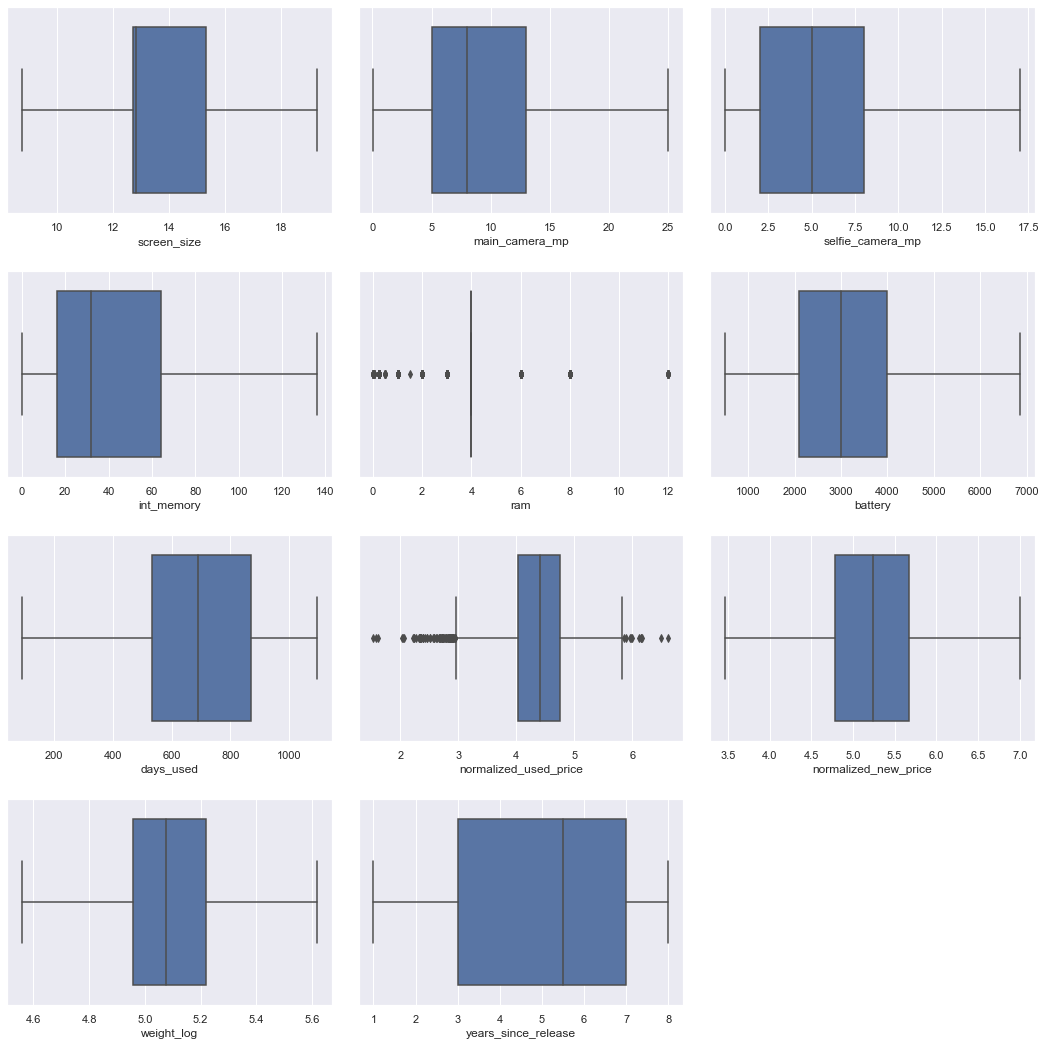

In [797]:
# outlier detection using boxplot
numeric_cols = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* All outliers in the independent columns were treated apart from the ram column

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [798]:
# Checking the statistical summary once again
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.586329,4.572418,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.694079,39.079988,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3109.100898,1212.793754,500.0,2100.0,3000.0,4000.0,6850.0


In [799]:
# check df2 has no missing values as required
df2.isnull().sum().sum()

0

In [800]:
# take a look at how df2 data looks like now
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,weight_log,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,4.983607,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,5.361292,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,5.361292,1
3,Honor,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,345,5.135387,5.630961,5.617149,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,5.220356,1


**NB:** Before preparing data for modeling, Let us go ahead and drop the brand_name column as explained before.

In [801]:
df2["brand_name"].nunique()

34

* This column has very many categories(34) which means after creating dummies, very many columns will be formed
* This information in the brand name column can be grouped int os which column we already have and with fewer unique values
* Hence, let us go ahead and drop it

In [802]:
df2.drop(["brand_name"], axis=1, inplace=True) # drop brand_name column
df2.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,weight_log,years_since_release
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,4.983607,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,5.361292,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,5.361292,1
3,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,345,5.135387,5.630961,5.617149,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,5.220356,1


* brand_name coulumn dropped.

In [803]:
df2.dtypes

os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
weight_log               float64
years_since_release        int64
dtype: object

### Data Preparation For Modeling

* We want to predict the normalized price of used devices
* Before we proceed to build a model, we'll have to encode categorical features
* We'll split the data into train and test to be able to evaluate the model that we build on the train data
* We will build a Linear Regression model using the train data and then check it's performance

In [804]:
# define dependent and independent variables
X = df2.drop(["normalized_used_price"], axis=1)
y = df2["normalized_used_price"]

print(X.head())
print()
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        19.30  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  days_used  normalized_new_price  weight_log  \
0        64.0  3.0   3020.0        127              4.715100    4.983607   
1       128.0  8.0   4300.0        325              5.519018    5.361292   
2       128.0  8.0   4200.0        162              5.884631    5.361292   
3        64.0  6.0   6850.0        345              5.630961    5.617149   
4        64.0  3.0   5000.0        293              4.947837    5.220356   

   years_since_release  
0                    1  
1                    1  
2                    1  
3               

In [805]:
# let's add the intercept to data
X = sm.add_constant(X)

In [806]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_new_price,weight_log,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,127.0,4.715100,4.983607,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,325.0,5.519018,5.361292,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,162.0,5.884631,5.361292,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,345.0,5.630961,5.617149,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,293.0,4.947837,5.220356,1.0,0.0,0.0,0.0,1.0,0.0


In [807]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [808]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [809]:
# fitting a linear model
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     812.6
Date:                   Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                           07:32:28   Log-Likelihood:                 52.372
No. Observations:                   2417   AIC:                            -72.74
Df Residuals:                       2401   BIC:                             19.90
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Observation:
* Adjusted R-Squared is equal 0.834, which is good
* The y-intercept is equal to the value of the const coeffiecient which is -0.0729
* The coefficients of the different predictor variables is well listed in the model summary forexample;
* The coefficient of normalized_new_price is equal to 0.4116

## Model Performance Check

#### Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and  𝑅2
* We will define a function to calculate MAPE and adjusted  𝑅2
* We will create a function which will print out all the above metrics in one go.

In [810]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [811]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236784,0.183228,0.835434,0.834337,4.414471


In [812]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243144,0.18733,0.83609,0.833518,4.577868


**Observations:**
* The training R-SQUARE is 0.834, so the model is not underfitting.
* The train and test RMSE and MAE are comparable, so the model is not overfitting either.
* MAE suggests that the model can predict the price of a used device within a mean error of 0.187 on the test data.
* MAPE of 4.58 on the test data means that we are able to predict within 4.6% of the used device prices.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1.**No Multicollinearity**

2.**Linearity of variables** 

3.**Independence of error terms** 

4.**Normality of error terms**

5.**No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [813]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [814]:
checking_vif(x_train)  ## Writing the code to check VIF on train data

,feature,VIF
0,const,1227.232818
1,screen_size,5.020059
2,main_camera_mp,2.130616
3,selfie_camera_mp,3.613245
4,int_memory,2.149691
5,ram,2.061785
6,battery,3.511445
7,days_used,2.579919
8,normalized_new_price,2.795831
9,weight_log,4.297022


**Observations:**
* If VIF is between 1 and 5, then there is low multicollinearity.
* If VIF is between 5 and 10, we say there is moderate multicollinearity.
* If VIF is exceeding 10, it shows signs of high multicollinearity.

**Therefore:**  - screen_size and years_since_release show moderate collinearity Let us go ahead and treat the multicollinearity

### Removing Multicollinearity (if needed)

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [815]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [816]:
col_list = ['screen_size','years_since_release'] ## Writing the code to specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Writing the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.834071,0.237812
1,screen_size,0.826593,0.243112


* Dropping screen_size will have the maximum impact on the predictive power of the model as compared to years_since_release.
* Therefore we'll drop years_since_release and check the VIF again.

In [817]:
col_to_drop = 'years_since_release' ## Writing the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Writing the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Writing the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,1227.210923
1,screen_size,4.947946
2,main_camera_mp,2.120467
3,selfie_camera_mp,3.104717
4,int_memory,2.104077
5,ram,2.057198
6,battery,3.436401
7,days_used,1.857689
8,normalized_new_price,2.488419
9,weight_log,4.283882


* Dropping years_since_release has brought the VIF of screen_size below 5.
* Hence the above predictors have no multicollinearity and the assumption is satisfied
* Let us check the model summary again

In [818]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     868.5
Date:                   Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                           07:32:30   Log-Likelihood:                 49.427
No. Observations:                   2417   AIC:                            -68.85
Df Residuals:                       2402   BIC:                             18.00
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations:**
* We can see that adj. R-squared has not changed at all, which shows that the dropped column did not have much effect on the model.
* As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [819]:
# initial list of columns
predictors = x_train2.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'normalized_new_price', 'weight_log', 'os_Others', '4g_yes']


In [820]:
x_train3 = x_train2[['const'] + selected_features]  ## Writing the code to specify the train data from which to select the specified columns
x_test3 = x_test2[['const'] + selected_features]  ## Writing the code to specify the test data from which to select the specified columns

In [821]:
# print model summary
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1350.
Date:                   Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                           07:32:31   Log-Likelihood:                 46.606
No. Observations:                   2417   AIC:                            -73.21
Df Residuals:                       2407   BIC:                            -15.31
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Now no feature (other than the constant) has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as final model.

**Observations:**
* Now adjusted R-squared is 0.834, i.e., our model is able to explain ~83% of the variance. This shows that the model is good.
* The adjusted R-squared in olsmodel (where we considered all the variables) was 0.834. This shows that the variables we dropped were not affecting the model much.

In [822]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train) ## Writing the code to check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23735,0.183576,0.834647,0.83396,4.424958


In [823]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) ## Writing the code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244273,0.188165,0.834565,0.832952,4.607551


**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

* We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
* If there is no pattern, then we say the model is linear and residuals are independent.
* Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [824]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.800785,0.286703
1525,4.448399,4.671627,-0.223227
1128,4.315353,4.312365,0.002987
3003,4.282068,4.203344,0.078724
2907,4.456438,4.494569,-0.038130


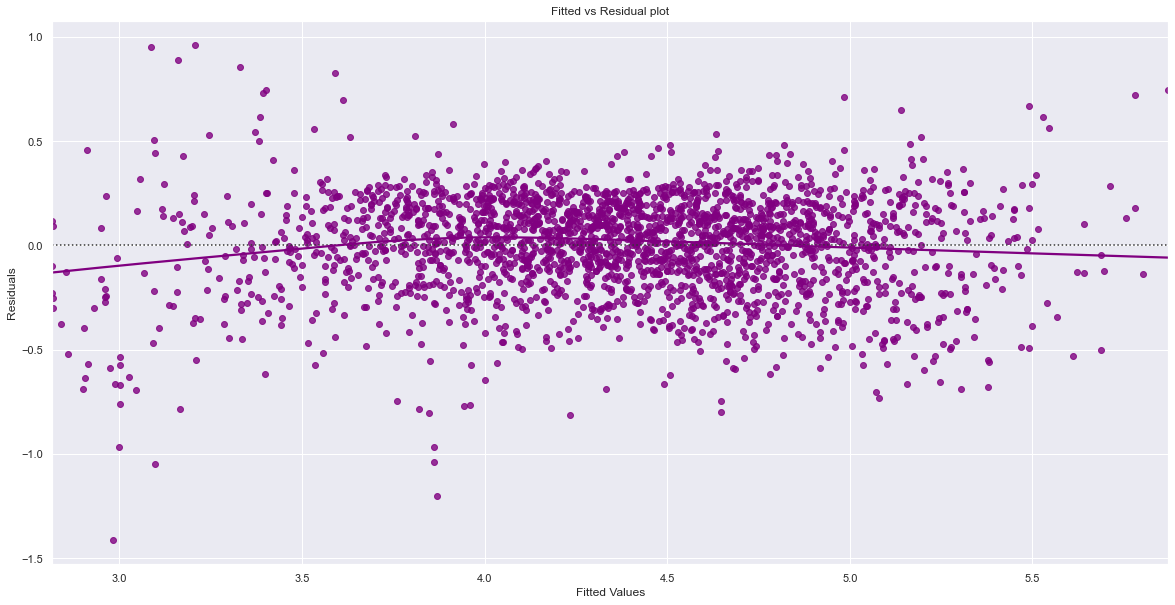

In [825]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations:**
* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
* There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

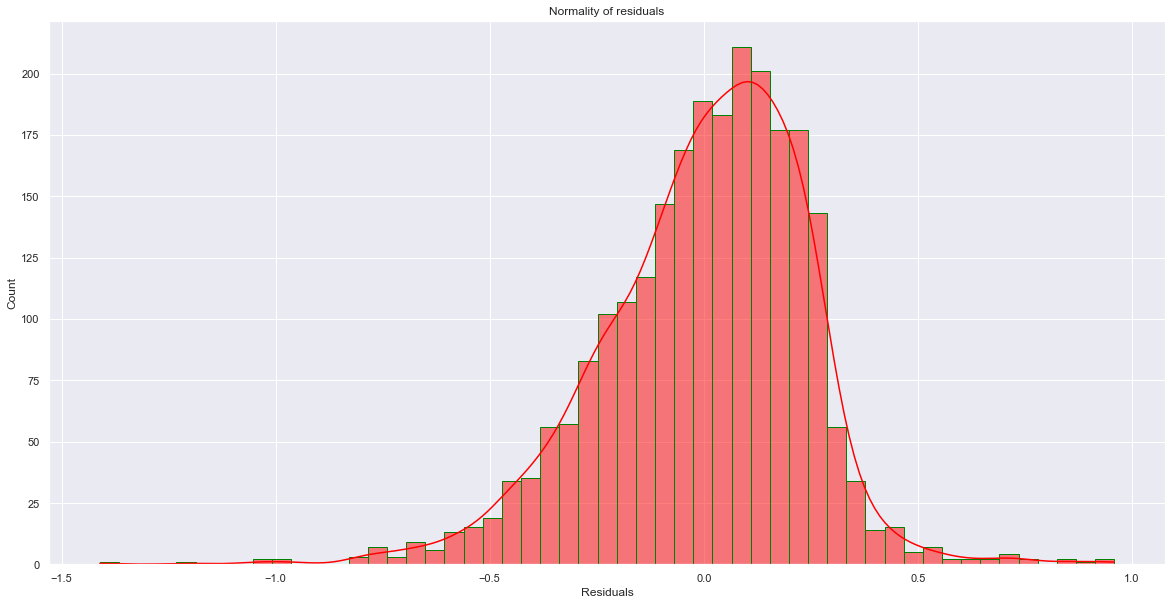

In [826]:
sns.histplot(data=df_pred,x='Residuals',kde=True,color='red',edgecolor='green') ## Writing the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

**Observations:**
* The histogram of residuals does have a bell shape.
* Let's check the Q-Q plot.

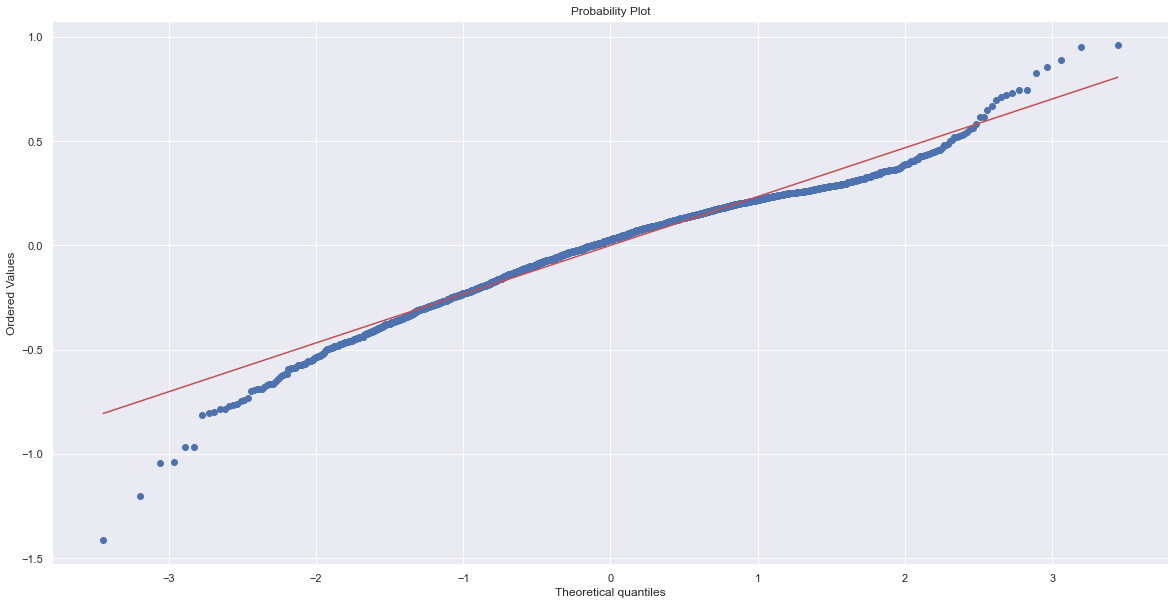

In [827]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab) ## Writing the code check Q-Q plot
plt.show()

**Observations:**
* The residuals more or less follow a straight line except for the tails.
* Let's us see the results of the Shapiro-Wilk test.

In [828]:
stats.shapiro(df_pred['Residuals']) ## Writing the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.9711180329322815, pvalue=1.1404088285366056e-21)

**Observations:**
* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
* So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

* We will test for homoscedasticity by using the goldfeldquandt test.
* If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic

In [829]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) ## Writing the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0389346080820283), ('p-value', 0.2543034862552727)]

**Observations:**
* Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

**Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.**

In [830]:
# predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.396767
2341,3.696103,3.946634
1913,3.592093,3.715304
688,4.306495,4.143544
650,4.522115,5.126232
2291,4.259294,4.404316
40,4.997685,5.291358
1884,3.875359,4.070102
2538,4.206631,3.980933
45,5.380450,5.387768


* We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

* We can also visualize comparison result as a bar graph for a sample of 25 records

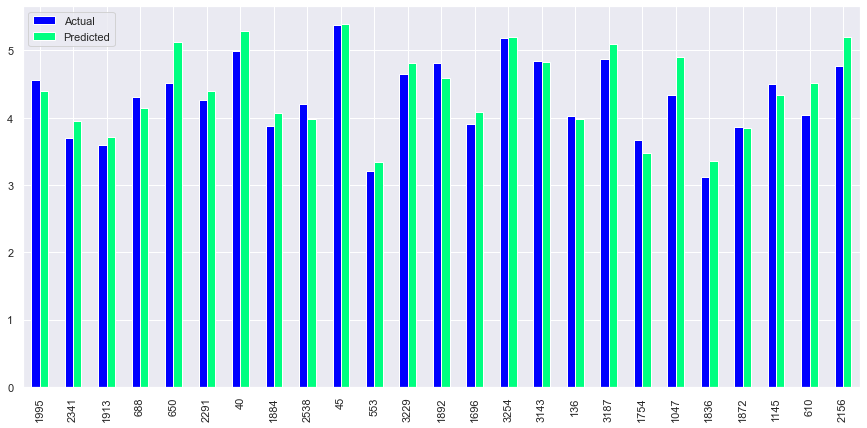

In [831]:
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7),colormap='winter')
plt.show()

## Final Model Summary

In [832]:
olsmodel_final = sm.OLS(y_train, x_train3).fit() ## Writing the code to fit the final model
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1350.
Date:                   Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                           07:32:37   Log-Likelihood:                 46.606
No. Observations:                   2417   AIC:                            -73.21
Df Residuals:                       2407   BIC:                            -15.31
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [833]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train) ## Writing the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23735,0.183576,0.834647,0.83396,4.424958


In [834]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test) ## Writing the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244273,0.188165,0.834565,0.832952,4.607551


#### Summary

* The model is able to explain ~83% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The Mean Absolute Percentage Error(MAPE) on the test set suggests we can predict the used devices prices within 4.6% error which is good because it is a low value

* Hence, we can conclude the model olsmod2 is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations 

* normalized_new_price has a strong positive correlation with used price. Hence the higher the price of the new device the higher the price of the same device in refurbished market.

* 1 unit increase in weight of the device leads to increase in the price of the refurbished device by 0.2612 euros

* screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, normalized_new_price, weight_log ,4G have positive coefficients. So, as they increase, the price of used devices also increases.

* Operating systems of devices other than Android, iOS, and windows have negative coefficients. Hence as they increase, the price of used devices decrease.

 In summary therefore, the factors that significantly influence the price of refurbished devices in the market are as listed as below; - Size of the screen of the devices - Main camera mega pixels - selfie camera pixels - internal memory - RAM of the devices - Price of the similar new device - weight of the devices - Whether the device is a 4G or not - Operating system


### Key Take Away

* Since retailers usually run checks repair used phones to meet a certain standard in the refurbished market, factors like number of days the device has been used, battery and years since release of the device do not show significant impact on the price of the refurbished device, hence Recell should not worry about those factors a lot. As long as the device is repaired, it will get market.

___